# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_validate ,GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import VotingRegressor

from datetime import datetime
from datasist.structdata import detect_outliers
import timeit

from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.feature_selection import SequentialFeatureSelector
import warnings
import joblib


# Show Data

In [2]:
df= pd.read_csv('cars_sales_cleaned.csv') # importing data
df # showing data

,condition,mileage_mi,price,state,model_year,car_age,manufacturer,fuel_type,drivetrain,transmission,exterior_color,interior_color,accidents_or_damage,1_owner_vehicle
0,Used,61110,11295,Illinois,2007,18,Acura,Gasoline,Front-wheel Drive,Fully Automatic,Grey Shades,Others,had accident/damage,First owner
1,Used,65715,23999,Illinois,2016,9,Audi,Gasoline,All-wheel Drive,Fully Automatic,Black Shades,Black Shades,had accident/damage,Multiple owners
2,Used,19830,39799,Illinois,2018,7,BMW,Gasoline,All-wheel Drive,Fully Automatic,Grey Shades,Black Shades,No accidents/damage,First owner
3,Used,52245,22966,Illinois,2019,6,Jeep,Gasoline,Four-wheel Drive,Fully Automatic,Black Shades,Black Shades,had accident/damage,Multiple owners
4,Used,94008,26995,Illinois,2019,6,Cadillac,Gasoline,All-wheel Drive,Fully Automatic,Black Shades,Black Shades,had accident/damage,Multiple owners
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,Used,58640,21991,Illinois,2020,5,Nissan,Gasoline,All-wheel Drive,Continuously Variable Transmission (CVT),Grey Shades,Grey and Silver Shades,No accidents/damage,First owner
5231,New,11,45735,Illinois,2024,1,Jeep,Gasoline,Four-wheel Drive,Fully Automatic,Black Shades,Others,No accidents/damage,First owner
5232,Used,40291,41795,Illinois,2021,4,Audi,Gasoline,All-wheel Drive,Fully Automatic,Grey Shades,Black Shades,had accident/damage,First owner
5233,New,11,62405,Illinois,2024,1,Mercedes-Benz,Gasoline,All-wheel Drive,Fully Automatic,Grey Shades,Black Shades,No accidents/damage,First owner


# Droping Unnecessary columns

In [3]:
df.drop(['car_age'], axis=1, inplace=True) #drop car_age column

# Data Understanding

In [4]:
df.info() #shows basic details about the columns and data types in my dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   condition            5235 non-null   object
 1   mileage_mi           5235 non-null   int64 
 2   price                5235 non-null   int64 
 3   state                5235 non-null   object
 4   model_year           5235 non-null   int64 
 5   manufacturer         5235 non-null   object
 6   fuel_type            5235 non-null   object
 7   drivetrain           5235 non-null   object
 8   transmission         5235 non-null   object
 9   exterior_color       5235 non-null   object
 10  interior_color       5235 non-null   object
 11  accidents_or_damage  5235 non-null   object
 12  1_owner_vehicle      5235 non-null   object
dtypes: int64(3), object(10)
memory usage: 531.8+ KB


In [5]:
df.isnull().sum() # checking null values

condition              0
mileage_mi             0
price                  0
state                  0
model_year             0
manufacturer           0
fuel_type              0
drivetrain             0
transmission           0
exterior_color         0
interior_color         0
accidents_or_damage    0
1_owner_vehicle        0
dtype: int64

In [6]:
df.duplicated().sum() # checking duplication in my data

np.int64(0)

In [7]:
df.describe() # show summary statistics for all numeric columns in the dataframe

,mileage_mi,price,model_year
count,5235.000000,5235.000000,5235.000000
mean,34364.521872,33136.098376,2019.906399
std,39336.939894,15836.255085,5.413052
min,0.000000,3777.000000,1982.000000
25%,9.000000,21059.500000,2018.000000
50%,20953.000000,30670.000000,2021.000000
75%,61254.000000,43160.000000,2024.000000
max,153077.000000,76198.000000,2025.000000


In [8]:
df.describe(include= 'O') # show summary statistics for all categorical columns in the dataframe

,condition,state,manufacturer,fuel_type,drivetrain,transmission,exterior_color,interior_color,accidents_or_damage,1_owner_vehicle
count,5235,5235,5235,5235,5235,5235,5235,5235,5235,5235
unique,3,2,46,4,4,6,8,9,2,2
top,Used,Illinois,Jeep,Gasoline,All-wheel Drive,Fully Automatic,Grey Shades,Black Shades,No accidents/damage,First owner
freq,2905,5021,542,4755,2273,4807,2030,3651,4135,3716


In [9]:
cat_col= df.select_dtypes(include='O')

# looping through the categorical columns to get the number of unique categories in each column

for col in cat_col:
    print(df[col].value_counts())
    print('NUnique: ',df[col].nunique())
    print()

condition
Used                         2905
New                          1997
Certified Pre-Owned (CPO)     333
Name: count, dtype: int64
NUnique:  3

state
Illinois    5021
Indiana      214
Name: count, dtype: int64
NUnique:  2

manufacturer
Jeep             542
Ford             509
Chevrolet        489
Nissan           393
Subaru           291
Honda            256
BMW              242
Mercedes-Benz    230
Toyota           214
Volkswagen       192
Kia              183
Audi             169
Lexus            153
Cadillac         144
RAM              132
Hyundai          109
INFINITI         104
Dodge             92
Lincoln           86
Mazda             82
GMC               74
Volvo             73
Chrysler          70
Buick             68
Acura             54
Porsche           47
Land              38
Jaguar            32
Mitsubishi        32
Alfa              24
MINI              22
Genesis           21
Scion             16
Maserati          12
Aston              9
Pontiac            8
S

# Data Visualization

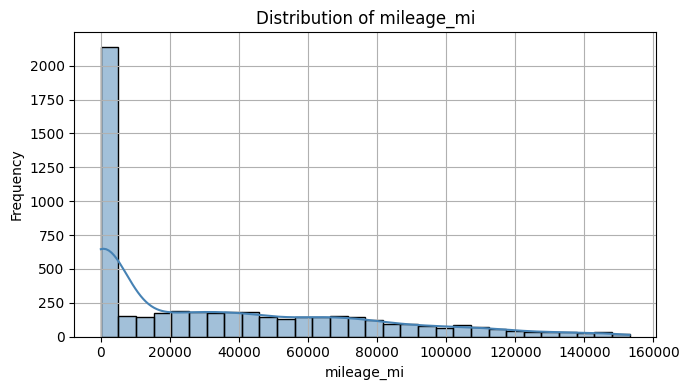

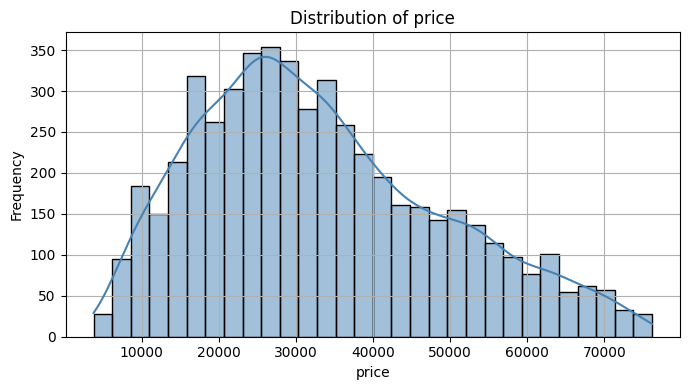

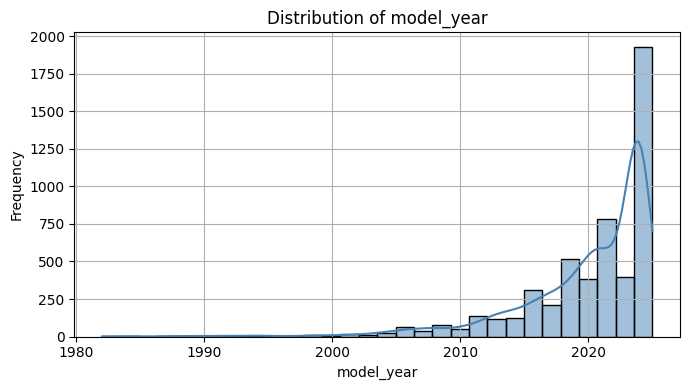

In [10]:
num_col= df.select_dtypes(include='number') # Select all numeric columns from the dataframe

#looping through the numerical values to get their distribution
for col in num_col:
    plt.figure(figsize=(7, 4))
    sns.histplot(df[col], bins=30, kde=True, color='steelblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

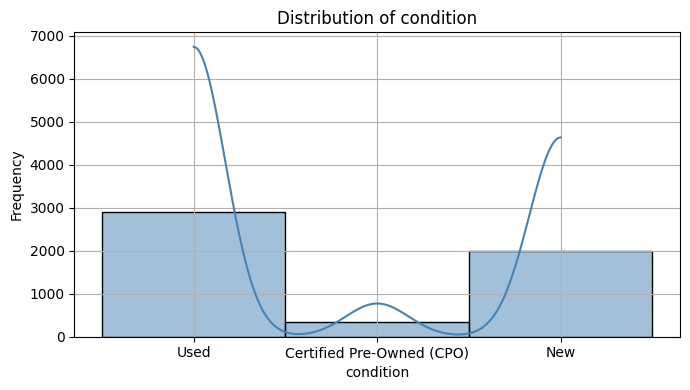

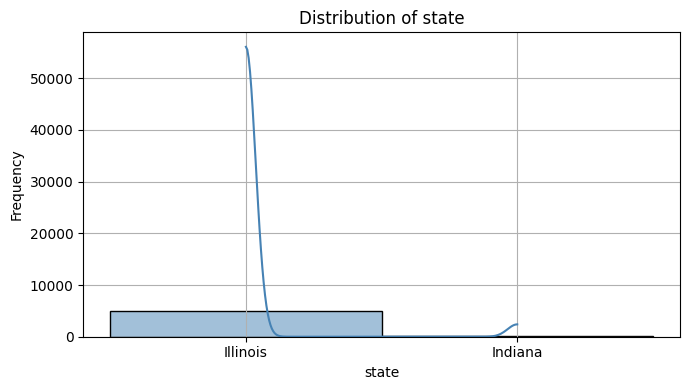

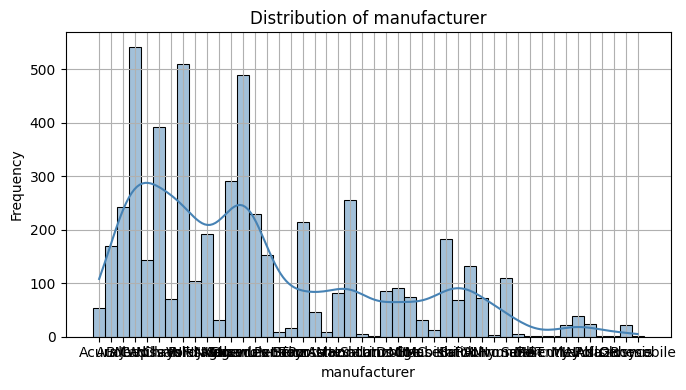

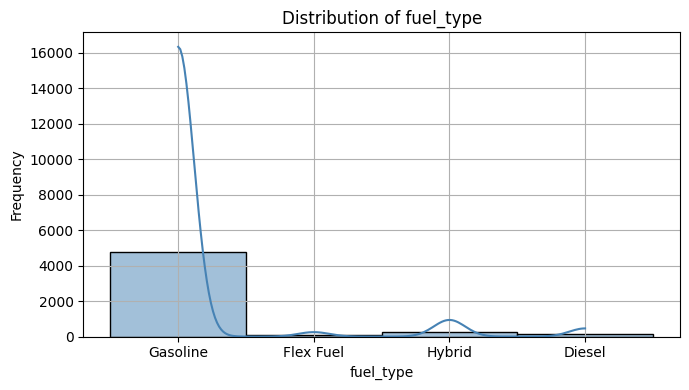

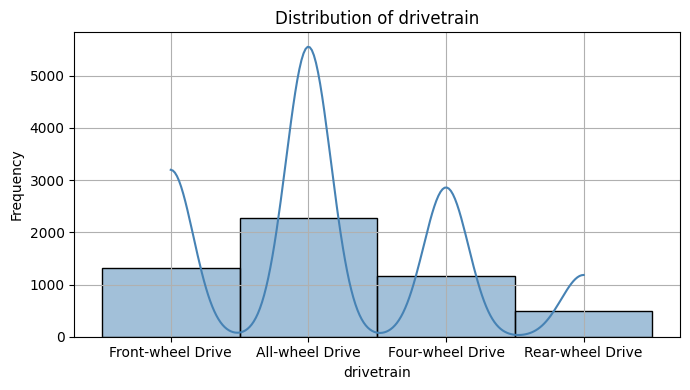

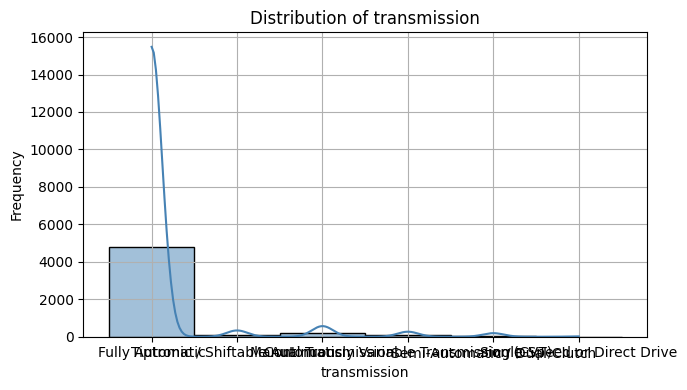

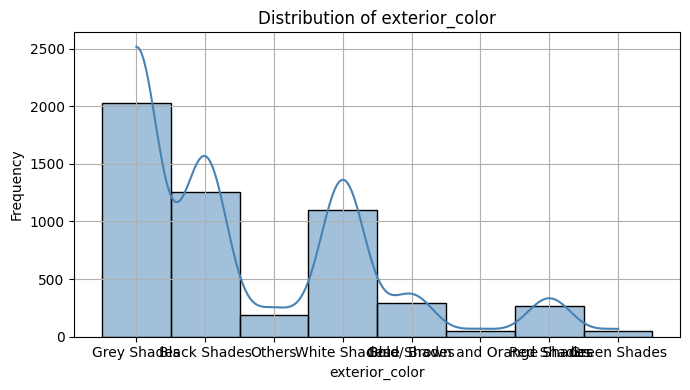

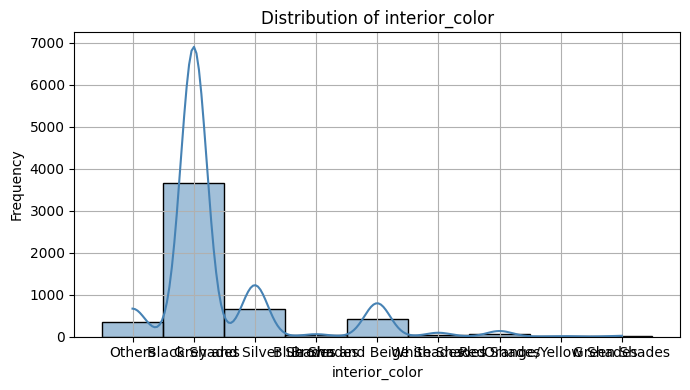

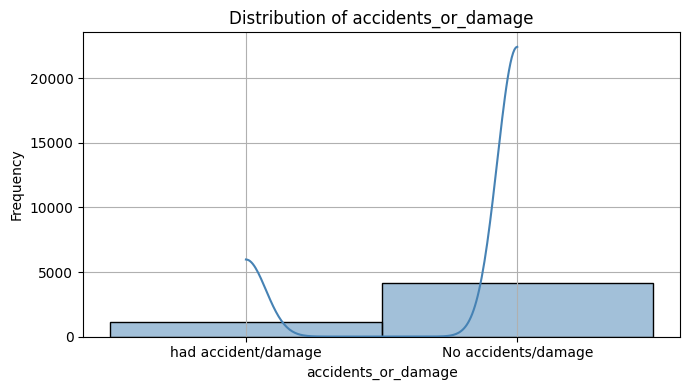

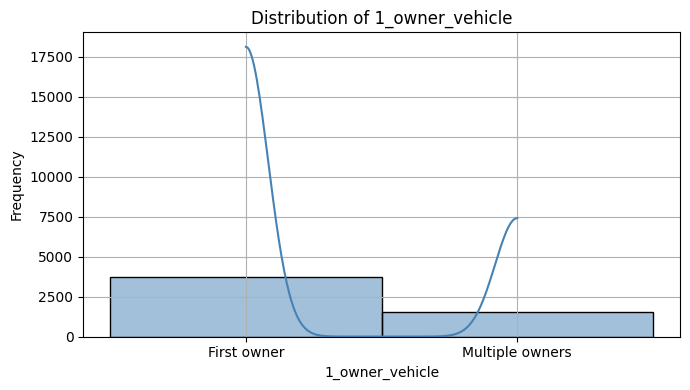

In [11]:
cat_col= df.select_dtypes(include='O') # Select all categorical columns from the datafram

# looping through the categorical columns to show the distribution of the categorical data

for col in cat_col:
    plt.figure(figsize=(7, 4))
    sns.histplot(df[col], bins=30, kde=True, color='steelblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

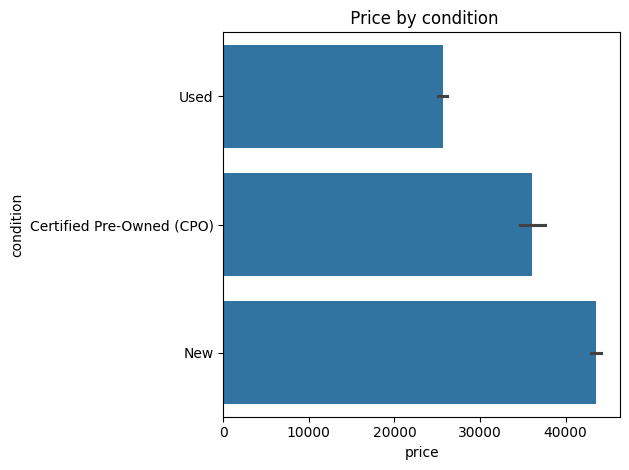

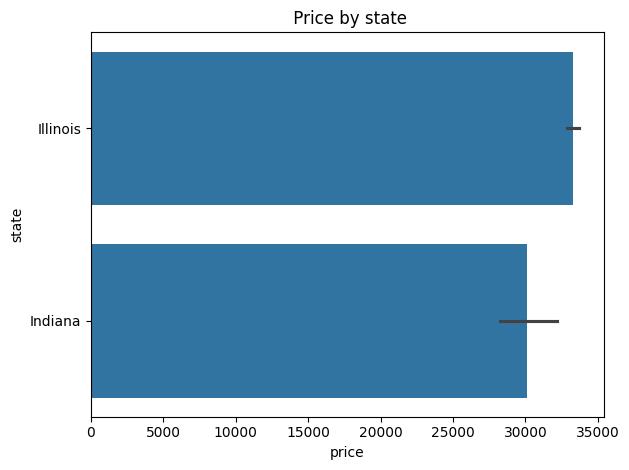

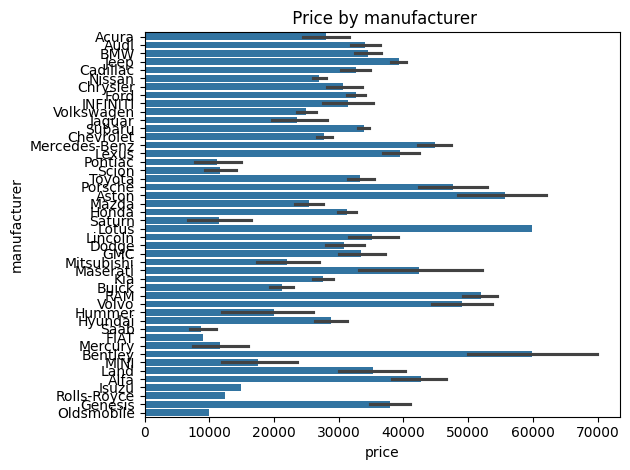

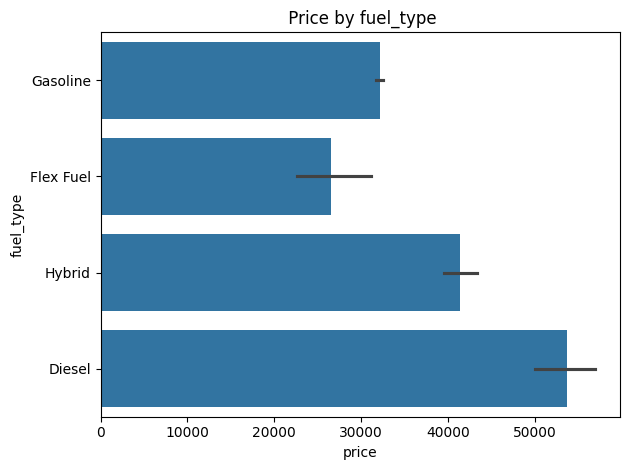

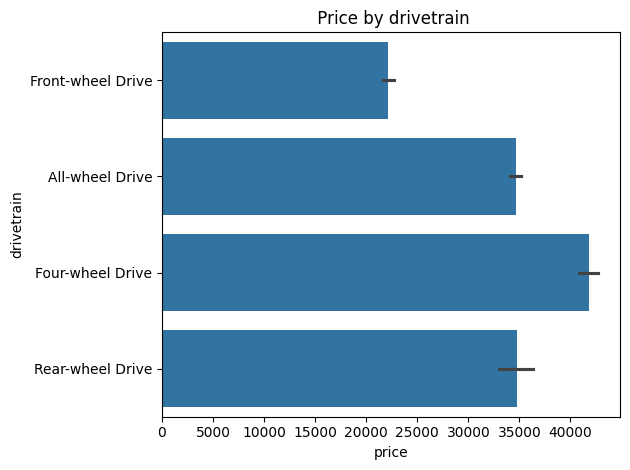

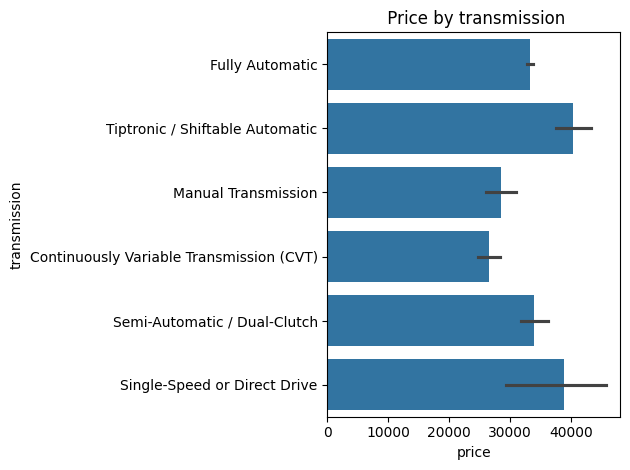

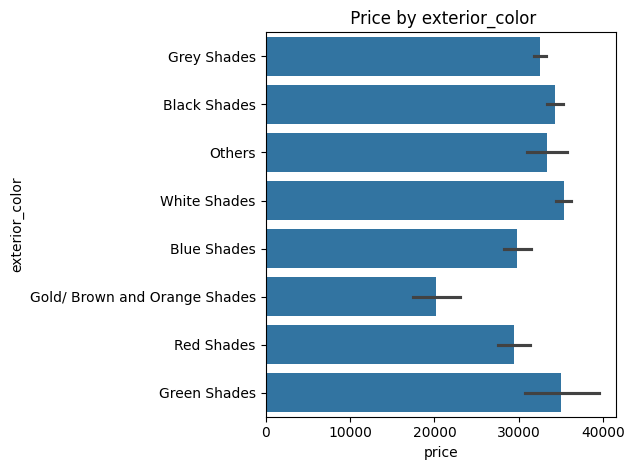

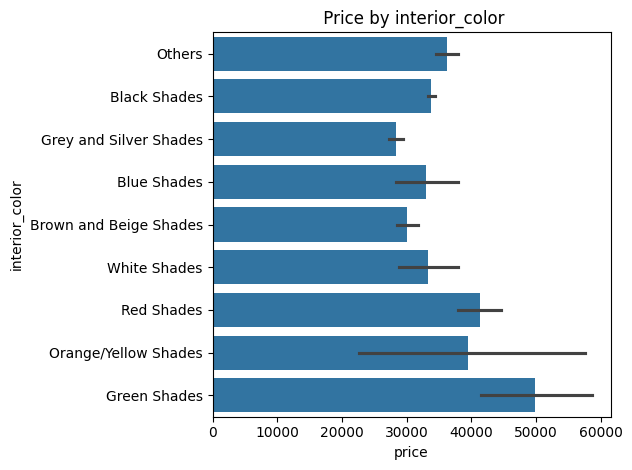

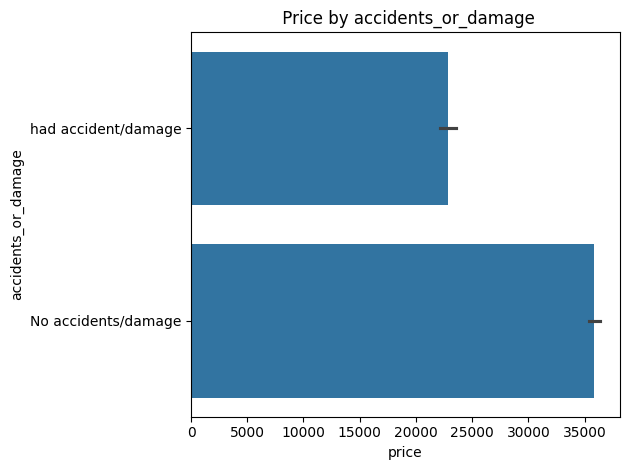

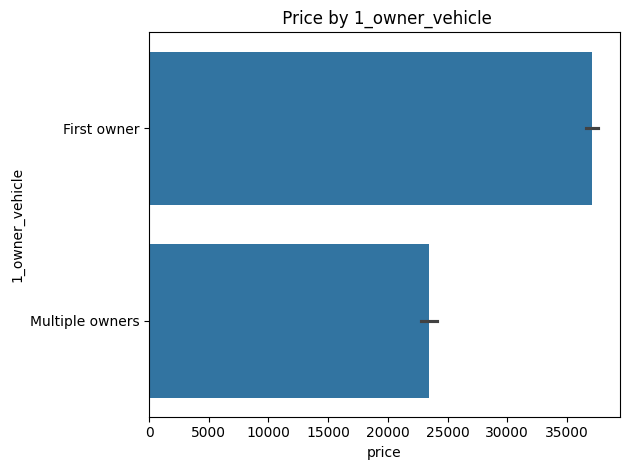

In [12]:
# looping through the categorical columns with relation to the price

for col in cat_col:
    sns.barplot(df, y=col, x='price')
    plt.title(f" Price by {col}")
    plt.tight_layout()
    plt.show()

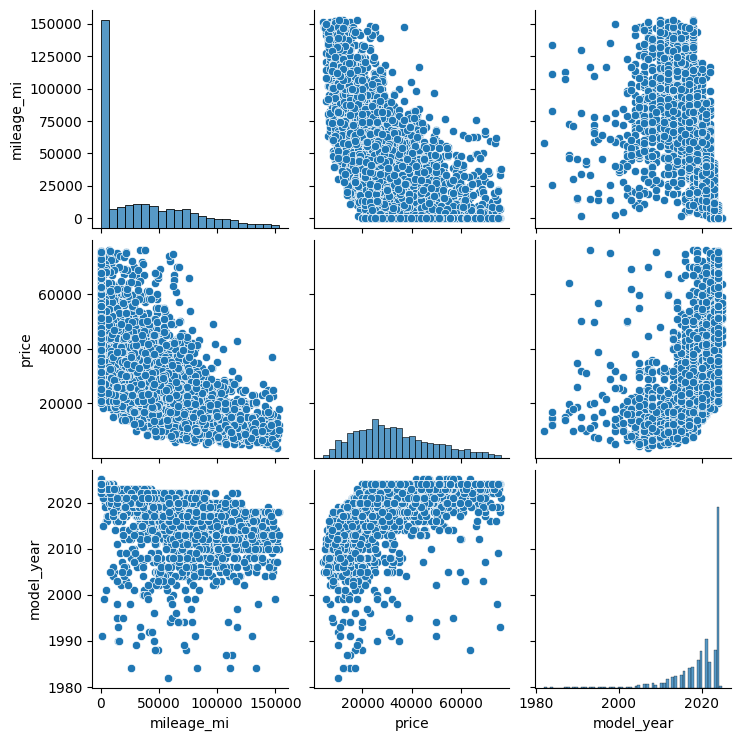

In [13]:
sns.pairplot(df.select_dtypes('number')) # Creates scatterplots and histograms for all numeric columns to visualize relationships and distributions

<Axes: >

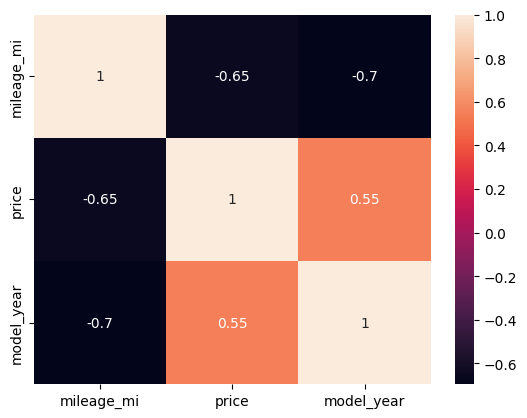

In [14]:
sns.heatmap(df.select_dtypes('number').corr(),annot=True) # Plots a heatmap of correlation between numeric columns

# Final check for data null values and duplicate before working on pipeline

In [15]:
df.isnull().sum()

condition              0
mileage_mi             0
price                  0
state                  0
model_year             0
manufacturer           0
fuel_type              0
drivetrain             0
transmission           0
exterior_color         0
interior_color         0
accidents_or_damage    0
1_owner_vehicle        0
dtype: int64

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df

,condition,mileage_mi,price,state,model_year,manufacturer,fuel_type,drivetrain,transmission,exterior_color,interior_color,accidents_or_damage,1_owner_vehicle
0,Used,61110,11295,Illinois,2007,Acura,Gasoline,Front-wheel Drive,Fully Automatic,Grey Shades,Others,had accident/damage,First owner
1,Used,65715,23999,Illinois,2016,Audi,Gasoline,All-wheel Drive,Fully Automatic,Black Shades,Black Shades,had accident/damage,Multiple owners
2,Used,19830,39799,Illinois,2018,BMW,Gasoline,All-wheel Drive,Fully Automatic,Grey Shades,Black Shades,No accidents/damage,First owner
3,Used,52245,22966,Illinois,2019,Jeep,Gasoline,Four-wheel Drive,Fully Automatic,Black Shades,Black Shades,had accident/damage,Multiple owners
4,Used,94008,26995,Illinois,2019,Cadillac,Gasoline,All-wheel Drive,Fully Automatic,Black Shades,Black Shades,had accident/damage,Multiple owners
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,Used,58640,21991,Illinois,2020,Nissan,Gasoline,All-wheel Drive,Continuously Variable Transmission (CVT),Grey Shades,Grey and Silver Shades,No accidents/damage,First owner
5231,New,11,45735,Illinois,2024,Jeep,Gasoline,Four-wheel Drive,Fully Automatic,Black Shades,Others,No accidents/damage,First owner
5232,Used,40291,41795,Illinois,2021,Audi,Gasoline,All-wheel Drive,Fully Automatic,Grey Shades,Black Shades,had accident/damage,First owner
5233,New,11,62405,Illinois,2024,Mercedes-Benz,Gasoline,All-wheel Drive,Fully Automatic,Grey Shades,Black Shades,No accidents/damage,First owner


In [18]:
df.to_csv('cars_sales_cleaned_For_deployment.csv', index=False) # Saves the cleaned DataFrame to a CSV file

Note: 

Please note that I have tried to minmize the number of unique values in all columns such as manufacture, exterior and interior colors and other columns as much of them contain imbalanced categories. However this is did not work and I geot less test score (very low score). So I decided to not group inbalanced categories and leave them as they are so that when deploying, users can see all spesific option they might want to predict. I also tryied to encode categories using binary and onehotencoder depending on the number of values in each category but that did not work and there was no change so I decided to use only one encoder. 

# Now Let's Work on Pipeline

In [19]:
# spliting data into train and test
x = df.drop('price', axis=1)
y = np.log(df['price'])  # Log-transform to normalize skew

# Now let's work on creating different machine learing models 

# 1- XGB Regressor Model

In [20]:
# Start timing
start = timeit.default_timer()

warnings.filterwarnings("ignore", category=UserWarning)

# Defining categorical columns for OneHotEncoder
onehot_cols = ['condition', 'fuel_type', 'drivetrain', 'accidents_or_damage','1_owner_vehicle', 'exterior_color', 'interior_color', 'manufacturer', 'transmission', 'state']


# Creating Pipeline 
pipeline = Pipeline(steps=[
    ("encoder", ColumnTransformer(transformers=[('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), onehot_cols)], remainder='passthrough')),
    ("scaler", RobustScaler()), # Scale features using RobustScaler to reduce effect of outliers
    ("model", XGBRegressor(random_state=4))]) # Defining the regression model

# Define scoring metrics for evaluation
scoring = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']

# Using cross-validation to return train and test scores
scores = cross_validate(pipeline, x, y, cv=5, scoring=scoring, return_train_score=True)

# Print Results
print('XGB Regressor Evaluation')
print("-" * 40)
print("Train R² Score:  ", scores['train_r2'].mean())
print("Test  R² Score:  ", scores['test_r2'].mean())
print("Train RMSE:      ", (-scores['train_neg_root_mean_squared_error']).mean())
print("Test  RMSE:      ", (-scores['test_neg_root_mean_squared_error']).mean())
print("Train MAE:       ", (-scores['train_neg_mean_absolute_error']).mean())
print("Test  MAE:       ", (-scores['test_neg_mean_absolute_error']).mean())
print("=" * 35)

# End timing
stop = timeit.default_timer()
print("Run Time:", round((stop - start) / 60, 2), "minutes")
print("=" * 40)

# XGB Regressor Evaluation
# ----------------------------------------
# Train R² Score:   0.9384201968987315
# Test  R² Score:   0.8240400775584492
# Train RMSE:       0.13181167462773485
# Test  RMSE:       0.21959988735579855
# Train MAE:        0.09822895036789206
# Test  MAE:        0.1633440069910828
# ===================================
# Run Time: 0.04 minutes

XGB Regressor Evaluation
----------------------------------------
Train R² Score:   0.9384201968987315
Test  R² Score:   0.8240400775584492
Train RMSE:       0.13181167462773485
Test  RMSE:       0.21959988735579855
Train MAE:        0.09822895036789206
Test  MAE:        0.1633440069910828
Run Time: 0.04 minutes


## Now Let's Do Hyperparameter Tuning to Improve the XGB Regressor Model

In [21]:
# Starting the time
start = timeit.default_timer()

# Defining the hyperparameter grid for XGBoost
XG_param_grid = {
    'model__n_estimators': [100, 150, 200],  # Number of trees in the model
    'model__max_depth': [3, 5, 7],           # Maximum tree depth for base learners
    'model__learning_rate': [0.01, 0.05, 0.1], # Step size shrinkage to prevent overfitting
    'model__subsample': [0.6, 0.8, 1.0],    # Subsample ratio of the training instances
    'model__colsample_bytree': [0.6, 0.8, 1.0] # Subsample ratio of columns when constructing each tree
}

# Creating GridSearchCV with 5-fold cross-validation to find the best combination of parameters.
grid = GridSearchCV(pipeline, param_grid=XG_param_grid,cv=5,scoring='r2', verbose=1, n_jobs=-1,return_train_score=True)

# Fit the pipeline on the full data
grid.fit(x, y)

# Print best parameters and scores
print("=" * 30)
print("Best Parameters:", grid.best_params_)
print("Best Train R² Score:", grid.cv_results_["mean_train_score"].max())
print("Best Test R² Score:", grid.cv_results_["mean_test_score"].max())
print("=" * 30)

#Ending the time
stop = timeit.default_timer()
print("Run Time:", round((stop - start) / 60, 2), "minutes")


# Fitting 5 folds for each of 243 candidates, totalling 1215 fits
# ==============================
# Best Parameters: {'model__colsample_bytree': 0.6, 'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 200, 'model__subsample': 0.8}
# Best Train R² Score: 0.9491928816056749
# Best Test R² Score: 0.8338801905583951
# ==============================
# Run Time: 4.95 minutes


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'model__colsample_bytree': 0.6, 'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 200, 'model__subsample': 0.8}
Best Train R² Score: 0.9491928816056749
Best Test R² Score: 0.8338801905583951
Run Time: 4.95 minutes


### Now Let's Apply the Best Parameters to Improve the XGB Regressor Model

In [22]:
# Start timing
start = timeit.default_timer()

warnings.filterwarnings("ignore", category=UserWarning)

# Define categorical columns for OneHotEncoder
onehot_cols = ['condition', 'fuel_type', 'drivetrain', 'accidents_or_damage','1_owner_vehicle', 'exterior_color', 'interior_color', 'manufacturer', 'transmission', 'state']

# Creating Pipeline
pipeline = Pipeline(steps=[
    ("encoder", ColumnTransformer(transformers=[('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), onehot_cols)], remainder='passthrough')),
    ("scaler", RobustScaler()),
    ("model", XGBRegressor(colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8, random_state=42, n_jobs=-1))])

# Define scoring metrics to evaluate model performance
scoring = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']

# Perform 5-fold cross-validation and return both train and test scores
scores = cross_validate(pipeline, x, y, cv=5, scoring=scoring, return_train_score=True)

# Print Results
print('XGB Regressor Evaluation after Tuning')
print("-" * 40)
print("Train R² Score:  ", scores['train_r2'].mean())
print("Test  R² Score:  ", scores['test_r2'].mean())
print("Train RMSE:      ", (-scores['train_neg_root_mean_squared_error']).mean())
print("Test  RMSE:      ", (-scores['test_neg_root_mean_squared_error']).mean())
print("Train MAE:       ", (-scores['train_neg_mean_absolute_error']).mean())
print("Test  MAE:       ", (-scores['test_neg_mean_absolute_error']).mean())
print("=" * 35)

# End timing
stop = timeit.default_timer()
print("Run Time:", round((stop - start) / 60, 2), "minutes")
print("=" * 40)

# XGB Regressor Evaluation after Tuning
# ----------------------------------------
# Train R² Score:   0.9070745524386485
# Test  R² Score:   0.8322232997673231
# Train RMSE:       0.1619564224088738
# Test  RMSE:       0.2142334364150092
# Train MAE:        0.12463157649441511
# Test  MAE:        0.16059608243436485
# ===================================
# Run Time: 0.07 minutes

XGB Regressor Evaluation after Tuning
----------------------------------------
Train R² Score:   0.9070745524386485
Test  R² Score:   0.8322232997673231
Train RMSE:       0.1619564224088738
Test  RMSE:       0.2142334364150092
Train MAE:        0.12463157649441511
Test  MAE:        0.16059608243436485
Run Time: 0.07 minutes


Model Evaluation:

1. R² Score:

Train: 0.91 → Model fits training data very well.

Test: 0.83 → Still very good on new data.

Small drop means it’s not overfitting much.

2. RMSE & MAE (error size)

Train RMSE: 0.16, Test RMSE: 0.21 → Predictions are close to real values.

Train MAE: 0.12, Test MAE: 0.16 → On average, the predictions are off by about 0.12–0.16 units.

Finding: Model is accurate and only small difference between train and test

### Now let's Apply Forward Elimination to the XGB Regressor  Model (Wrapper Method)

In [23]:
# Define categorical columns for OneHotEncoding

onehot_cols = ['condition', 'fuel_type', 'drivetrain', 'accidents_or_damage','1_owner_vehicle', 'exterior_color', 'interior_color','manufacturer', 'transmission', 'state']

# Create the encoder
Encoder = ColumnTransformer(transformers=[('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), onehot_cols)], remainder='passthrough')

# Fit encoder and transform data
x_encoded = Encoder.fit_transform(x)

# Get feature names from the encoder. This gives the names after all transformations
feature_names_all = Encoder.get_feature_names_out()

# Define XGBoost regressor with tuned hyperparameters
model = XGBRegressor(colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8, random_state=42, n_jobs=-1)

# Apply forward feature selection
Forward = SequentialFeatureSelector(estimator=model, n_features_to_select='auto', tol=None, direction='forward', n_jobs=-1)

# Fiting the forwad selection
Forward.fit(x_encoded, y)

# Get the mask of selected features 
mask = Forward.get_support()

# Get only selected feature names 
selected_feature_names = feature_names_all[mask]

# Transform data and create new DataFrame with selected features
x_selected = Forward.transform(x_encoded)
forward_eli = pd.DataFrame(x_selected, columns=selected_feature_names)
forward_eli

,onehot__condition_Used,onehot__fuel_type_Gasoline,onehot__drivetrain_Four-wheel Drive,onehot__drivetrain_Front-wheel Drive,onehot__drivetrain_Rear-wheel Drive,onehot__interior_color_Brown and Beige Shades,onehot__interior_color_Red Shades,onehot__manufacturer_Aston,onehot__manufacturer_Audi,onehot__manufacturer_BMW,...,onehot__manufacturer_Porsche,onehot__manufacturer_RAM,onehot__manufacturer_Subaru,onehot__manufacturer_Toyota,onehot__manufacturer_Volkswagen,onehot__manufacturer_Volvo,onehot__transmission_Manual Transmission,onehot__transmission_Semi-Automatic / Dual-Clutch,remainder__mileage_mi,remainder__model_year
0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61110.0,2007.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65715.0,2016.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19830.0,2018.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52245.0,2019.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94008.0,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58640.0,2020.0
5231,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2024.0
5232,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40291.0,2021.0
5233,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2024.0


In [24]:
start = timeit.default_timer()

warnings.filterwarnings("ignore", category=UserWarning)

# Creating pipeline (no encoder needed as features are already numeric)
pipeline = Pipeline(steps=[
    ("scaler", RobustScaler()), 
    ("model", XGBRegressor(colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8, random_state=42, n_jobs=-1))])

# Define scoring metrics to evaluate model performance
scoring = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']

# Perform 5-fold cross-validation and return both train and test scores
scores = cross_validate(pipeline, forward_eli, y, cv=5, scoring=scoring, return_train_score=True)

# Print Results
print('XGB Regressor Evaluation after Forward Elimination')
print("-" * 40)
print("Train R² Score:  ", scores['train_r2'].mean())
print("Test  R² Score:  ", scores['test_r2'].mean())
print("Train RMSE:      ", (-scores['train_neg_root_mean_squared_error']).mean())
print("Test  RMSE:      ", (-scores['test_neg_root_mean_squared_error']).mean())
print("Train MAE:       ", (-scores['train_neg_mean_absolute_error']).mean())
print("Test  MAE:       ", (-scores['test_neg_mean_absolute_error']).mean())
print("=" * 35)

# End timing
stop = timeit.default_timer()
print("Run Time:", round((stop - start) / 60, 2), "minutes")
print("=" * 40)

# XGB Regressor Evaluation after Forward Elimination
# ----------------------------------------
# Train R² Score:   0.8979166433131155
# Test  R² Score:   0.8290969414773729
# Train RMSE:       0.16973622308155153
# Test  RMSE:       0.21626668702512325
# Train MAE:        0.1300333818947717
# Test  MAE:        0.16217369173309343
# ===================================
# Run Time: 0.03 minutes

XGB Regressor Evaluation after Forward Elimination
----------------------------------------
Train R² Score:   0.8979166433131155
Test  R² Score:   0.8290969414773729
Train RMSE:       0.16973622308155153
Test  RMSE:       0.21626668702512325
Train MAE:        0.1300333818947717
Test  MAE:        0.16217369173309343
Run Time: 0.03 minutes


### Now let's Apply Embeded Method to the XGB Regressor Model

In [25]:
#come back and fix the notes
onehot_cols = ['condition', 'fuel_type', 'drivetrain', 'accidents_or_damage','1_owner_vehicle', 'exterior_color', 'interior_color','manufacturer', 'transmission', 'state']

# 2. Create the encoder
Encoder = ColumnTransformer(transformers=[('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), onehot_cols)], remainder='passthrough')

x_encoded = Encoder.fit_transform(x) # This step transforms the categorical columns into numeric format

feature_names = Encoder.get_feature_names_out() # This gives you the column names after all transformations

# Step 3: Train model to get feature importances
model = XGBRegressor(learning_rate=0.1, max_depth=7, n_estimators=150, subsample=1, colsample_bytree=0.6, gamma=0, random_state=42, n_jobs=-1)

model.fit(x_encoded, y)

importances = model.feature_importances_ # This extract feature importances from the trained model

em = SelectFromModel(model) #selecting only the most important features

em.transform(x_encoded) # This reduces the data to only the selected (important) features

selected = em.get_support()
selected_features = feature_names[selected]

#em.fit(x_encoded,y)


embedded = pd.DataFrame(em.transform(x_encoded) , columns=selected_features)
embedded

,onehot__condition_Used,onehot__fuel_type_Gasoline,onehot__drivetrain_Four-wheel Drive,onehot__drivetrain_Front-wheel Drive,onehot__manufacturer_Aston,onehot__manufacturer_Audi,onehot__manufacturer_BMW,onehot__manufacturer_Cadillac,onehot__manufacturer_Chevrolet,onehot__manufacturer_Ford,...,onehot__manufacturer_Mazda,onehot__manufacturer_Mercedes-Benz,onehot__manufacturer_Nissan,onehot__manufacturer_Porsche,onehot__manufacturer_RAM,onehot__manufacturer_Subaru,onehot__manufacturer_Volkswagen,onehot__manufacturer_Volvo,remainder__mileage_mi,remainder__model_year
0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61110.0,2007.0
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65715.0,2016.0
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19830.0,2018.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52245.0,2019.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94008.0,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,58640.0,2020.0
5231,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2024.0
5232,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40291.0,2021.0
5233,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2024.0


In [26]:
# Start timing
start = timeit.default_timer()

warnings.filterwarnings("ignore", category=UserWarning)

# Creating pipeline (no encoder needed as features are already numeric)
pipeline = Pipeline(steps=[
    ("scaler", RobustScaler()), 
    ("model", XGBRegressor(colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8, random_state=42, n_jobs=-1))])

# Define scoring metrics to evaluate model performance
scoring = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']

# Perform 5-fold cross-validation and return both train and test scores
scores = cross_validate(pipeline, embedded, y, cv=5, scoring=scoring, return_train_score=True)

# Print Results
print('XGB Regressor Evaluation after Embeded Method')
print("-" * 40)
print("Train R² Score:  ", scores['train_r2'].mean())
print("Test  R² Score:  ", scores['test_r2'].mean())
print("Train RMSE:      ", (-scores['train_neg_root_mean_squared_error']).mean())
print("Test  RMSE:      ", (-scores['test_neg_root_mean_squared_error']).mean())
print("Train MAE:       ", (-scores['train_neg_mean_absolute_error']).mean())
print("Test  MAE:       ", (-scores['test_neg_mean_absolute_error']).mean())
print("=" * 35)

# End timing
stop = timeit.default_timer()
print("Run Time:", round((stop - start) / 60, 2), "minutes")
print("=" * 40)

# XGB Regressor Evaluation after Embeded Method
# ----------------------------------------
# Train R² Score:   0.8792246966816583
# Test  R² Score:   0.8077666176404739
# Train RMSE:       0.18462716220615066
# Test  RMSE:       0.22935205979442136
# Train MAE:        0.14044415784163938
# Test  MAE:        0.17163671817083137
# ===================================
# Run Time: 0.02 minutes

XGB Regressor Evaluation after Embeded Method
----------------------------------------
Train R² Score:   0.8792246966816583
Test  R² Score:   0.8077666176404739
Train RMSE:       0.18462716220615066
Test  RMSE:       0.22935205979442136
Train MAE:        0.14044415784163938
Test  MAE:        0.17163671817083137
Run Time: 0.02 minutes


# 2- Random Forest Regressor Model

In [27]:
# Start timing
start = timeit.default_timer()

warnings.filterwarnings("ignore", category=UserWarning)

# Defining categorical columns for OneHotEncoder
onehot_cols = ['condition', 'fuel_type', 'drivetrain', 'accidents_or_damage','1_owner_vehicle', 'exterior_color', 'interior_color', 'manufacturer', 'transmission', 'state']

# Creating Pipeline 
pipeline = Pipeline(steps=[
    ("encoder", ColumnTransformer(transformers=[('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), onehot_cols)], remainder='passthrough')),
    ("scaler", RobustScaler()),
    ("model", RandomForestRegressor(random_state=42))])

# Define scoring metrics for evaluation
scoring = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']

# Using cross-validation to return train and test scores
scores = cross_validate(pipeline, x, y, cv=5, scoring=scoring, return_train_score=True)

# Print Results
print('Random Forest Regressor Evaluation')
print("-" * 40)
print("Train R² Score:  ", scores['train_r2'].mean())
print("Test  R² Score:  ", scores['test_r2'].mean())
print("Train RMSE:      ", (-scores['train_neg_root_mean_squared_error']).mean())
print("Test  RMSE:      ", (-scores['test_neg_root_mean_squared_error']).mean())
print("Train MAE:       ", (-scores['train_neg_mean_absolute_error']).mean())
print("Test  MAE:       ", (-scores['test_neg_mean_absolute_error']).mean())
print("=" * 40)

# End timing
stop = timeit.default_timer()
print("Run Time:", round((stop - start) / 60, 2), "minutes")
print("=" * 40)

# Random Forest Regressor Evaluation
# ----------------------------------------
# Train R² Score:   0.9650645338518246
# Test  R² Score:   0.8024003686784237
# Train RMSE:       0.09924982293582696
# Test  RMSE:       0.23248267286001817
# Train MAE:        0.07181505256838626
# Test  MAE:        0.17271829919384518
# ========================================
# Run Time: 0.26 minutes
# ========================================

Random Forest Regressor Evaluation
----------------------------------------
Train R² Score:   0.9650645338518246
Test  R² Score:   0.8024003686784237
Train RMSE:       0.09924982293582696
Test  RMSE:       0.23248267286001817
Train MAE:        0.07181505256838626
Test  MAE:        0.17271829919384518
Run Time: 0.26 minutes


### Now Let's Do Hyperparameter Tuning to Improve the Random Forest Regressor Model

In [28]:
### It is gonna take a lot of time to run (one hour)

# Start timing
start = timeit.default_timer()

# Defining the hyperparameter grid for RandomForestRegressor
rf_param_grid = {
    'model__n_estimators': [100, 150, 200], # Number of trees in the forest
    'model__max_depth': [None, 10, 20, 8, 12, 15, 17], # Maximum depth of each tree
    'model__min_samples_split': [2, 4, 5, 8, 10], # Minimum samples required to split a node
    'model__min_samples_leaf': [1, 2, 4, 6], # Minimum samples required at a leaf nod
    'model__max_features': ['sqrt', 'log2', None], # Number of features considered for split
    'model__criterion': ['squared_error', 'absolute_error'] # Function to measure split quality

}

# Creating RandomizedSearchCV for faster hyperparameter search
search = RandomizedSearchCV(pipeline, param_distributions= rf_param_grid, n_iter=30, cv=5, scoring='r2', verbose=1, n_jobs=-1, random_state=42, return_train_score=True)

# Fit the pipeline with RandomizedSearchCV
search.fit(x, y)

# Print best parameters and scores
print("=" * 40)
print("Best Parameters:", search.best_params_)
print("Best Train R² Score:", search.cv_results_["mean_train_score"][search.best_index_])
print("Best Test  R² Score:", search.cv_results_["mean_test_score"][search.best_index_])
print("=" * 40)

# End timing
stop = timeit.default_timer()
print("Run Time:", round((stop - start) / 60, 2), "minutes")
print("=" * 40)


# Fitting 5 folds for each of 30 candidates, totalling 150 fits
# ========================================
# Best Parameters: {'model__n_estimators': 200, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_features': None, 'model__max_depth': None, 'model__criterion': 'absolute_error'}
# Best Train R² Score: 0.9653324519180353
# Best Test  R² Score: 0.8051537374396519
# ========================================
# Run Time: 53.39 minutes
# ========================================

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'model__n_estimators': 200, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_features': None, 'model__max_depth': None, 'model__criterion': 'absolute_error'}
Best Train R² Score: 0.9653324519180353
Best Test  R² Score: 0.8051537374396519
Run Time: 53.39 minutes


### Now Let us Apply the Best Parameters to Random Forest Regression Model

In [29]:
# Best Parameters: {'model__n_estimators': 200, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_features': None, 'model__max_depth': None, 'model__criterion': 'absolute_error'}

# Start timing
start = timeit.default_timer()

warnings.filterwarnings("ignore", category=UserWarning)

# Defining categorical columns for OneHotEncoder
onehot_cols = ['condition', 'fuel_type', 'drivetrain', 'accidents_or_damage','1_owner_vehicle', 'exterior_color', 'interior_color', 'manufacturer', 'transmission', 'state']

# Creating Pipeline 
pipeline = Pipeline(steps=[
    ("encoder", ColumnTransformer(transformers=[('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), onehot_cols)], remainder='passthrough')),
    ("scaler", RobustScaler()), # Scale features using RobustScaler to reduce effect of outliers
    # Defining the tuned RandomForestRegressor model
    ("model", RandomForestRegressor(criterion='absolute_error', max_depth= None, min_samples_leaf=1, min_samples_split=2, n_estimators=200, max_features= None, random_state=42))])

# Define scoring metrics for evaluation
scoring = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']

# Using cross-validation to return train and test scores
scores = cross_validate(pipeline, x, y, cv=5, scoring=scoring, return_train_score=True)

# Print Results
print('Random Forest Regressor Evaluatio After Tuning')
print("-" * 40)
print("Train R² Score:  ", scores['train_r2'].mean())
print("Test  R² Score:  ", scores['test_r2'].mean())
print("Train RMSE:      ", (-scores['train_neg_root_mean_squared_error']).mean())
print("Test  RMSE:      ", (-scores['test_neg_root_mean_squared_error']).mean())
print("Train MAE:       ", (-scores['train_neg_mean_absolute_error']).mean())
print("Test  MAE:       ", (-scores['test_neg_mean_absolute_error']).mean())
print("=" * 40)

# End timing
stop = timeit.default_timer()
print("Run Time:", round((stop - start) / 60, 2), "minutes")
print("=" * 40)

# Random Forest Regressor Evaluatio After Tuning
# ----------------------------------------
# Train R² Score:   0.9653324519180353
# Test  R² Score:   0.8051537374396519
# Train RMSE:       0.09886967012225359
# Test  RMSE:       0.23082833555717008
# Train MAE:        0.07145954930425441
# Test  MAE:        0.17135247151617194
# ========================================
# Run Time: 16.33 minutes

Random Forest Regressor Evaluatio After Tuning
----------------------------------------
Train R² Score:   0.9653324519180353
Test  R² Score:   0.8051537374396519
Train RMSE:       0.09886967012225359
Test  RMSE:       0.23082833555717008
Train MAE:        0.07145954930425441
Test  MAE:        0.17135247151617194
Run Time: 16.33 minutes


### Let's Try Another Parameters

In [30]:
# Start timing
start = timeit.default_timer()

warnings.filterwarnings("ignore", category=UserWarning)

# Defining categorical columns for OneHotEncoder
onehot_cols = ['condition', 'fuel_type', 'drivetrain', 'accidents_or_damage','1_owner_vehicle', 'exterior_color', 'interior_color', 'manufacturer', 'transmission', 'state']

# Creating Pipeline 
pipeline = Pipeline(steps=[
    ("encoder", ColumnTransformer(transformers=[('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), onehot_cols)], remainder='passthrough')),
    ("scaler", RobustScaler()), # Scale features using RobustScaler to reduce effect of outliers
    # Defining the tuned RandomForestRegressor model
    ("model", RandomForestRegressor(criterion='absolute_error', max_depth= None, min_samples_leaf=1, min_samples_split=4, n_estimators=150, max_features= 1.0, random_state=42))])


# Define scoring metrics for evaluation
scoring = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']

# Using cross-validation to return train and test scores
scores = cross_validate(pipeline, x, y, cv=5, scoring=scoring, return_train_score=True)

# Print Results
print('Random Forest Regressor Evaluation After Tuning')
print("-" * 40)
print("Train R² Score:  ", scores['train_r2'].mean())
print("Test  R² Score:  ", scores['test_r2'].mean())
print("Train RMSE:      ", (-scores['train_neg_root_mean_squared_error']).mean())
print("Test  RMSE:      ", (-scores['test_neg_root_mean_squared_error']).mean())
print("Train MAE:       ", (-scores['train_neg_mean_absolute_error']).mean())
print("Test  MAE:       ", (-scores['test_neg_mean_absolute_error']).mean())
print("=" * 40)

# End timing
stop = timeit.default_timer()
print("Run Time:", round((stop - start) / 60, 2), "minutes")
print("=" * 40)

# Random Forest Regressor Evaluation After Tuning
# ----------------------------------------
# Train R² Score:   0.9546264679254627
# Test  R² Score:   0.8074292403888993
# Train RMSE:       0.11312699611242068
# Test  RMSE:       0.22949834358397556
# Train MAE:        0.08262281968510485
# Test  MAE:        0.1703939380206489
# ========================================
# Run Time: 11.69 minutes

Random Forest Regressor Evaluation After Tuning
----------------------------------------
Train R² Score:   0.9546264679254627
Test  R² Score:   0.8074292403888993
Train RMSE:       0.11312699611242068
Test  RMSE:       0.22949834358397556
Train MAE:        0.08262281968510485
Test  MAE:        0.1703939380206489
Run Time: 11.69 minutes


Model Evaluation:

1. R² Score

Train: 0.95: Excellent fit on training data.

Test: 0.80: Still good, but lower than training, (it shows overfitting)

2. RMSE & MAE

Train RMSE: 0.11, Test RMSE: 0.22: Very small error on training, but error increases more on test.

Train MAE: 0.08, Test MAE: 0.17: Predictions are very close for training, but less accurate for test data.

Findings: 

Very strong on training but loses more accuracy on test data: signs of overfitting.

### Now let's Apply Embeded Method to the Random Forest Regressor Model

In [31]:
#come back and fix the notes

# Defining categorical columns for OneHotEncoder
onehot_cols = ['condition', 'fuel_type', 'drivetrain', 'accidents_or_damage','1_owner_vehicle', 'exterior_color', 'interior_color','manufacturer', 'transmission', 'state']

# Creating the encoder to transform categorical columns
Encoder = ColumnTransformer(transformers=[('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), onehot_cols)], remainder='passthrough')

# Encoding categorical columns into numeric format
x_encoded = Encoder.fit_transform(x) # This step transforms the categorical columns into numeric format

# Getting the names of the transformed features
feature_names = Encoder.get_feature_names_out() # This gives you the column names after all transformations

# Training the RandomForestRegressor to get feature importances
model = RandomForestRegressor(criterion='absolute_error', max_depth= None, min_samples_leaf=1, min_samples_split=2, n_estimators=200, max_features= None, random_state=42)

model.fit(x_encoded, y)

# This extract feature importances from the trained model
importances = model.feature_importances_ 

#selecting only the most important features
em = SelectFromModel(model) 

# Reducing the dataset to only selected important features
em.transform(x_encoded) # This reduces the data to only the selected (important) features

# Getting the names of selected features
selected = em.get_support()
selected_features = feature_names[selected]

#em.fit(x_encoded,y)

# Creating a DataFrame with only the selected important features
RF_embedded = pd.DataFrame(em.transform(x_encoded) , columns=selected_features)
RF_embedded

,onehot__fuel_type_Gasoline,onehot__drivetrain_Four-wheel Drive,onehot__drivetrain_Front-wheel Drive,onehot__exterior_color_Grey Shades,onehot__exterior_color_White Shades,onehot__manufacturer_Honda,onehot__manufacturer_Nissan,onehot__manufacturer_Subaru,remainder__mileage_mi,remainder__model_year
0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,61110.0,2007.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65715.0,2016.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,19830.0,2018.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,52245.0,2019.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94008.0,2019.0
...,...,...,...,...,...,...,...,...,...,...
5230,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,58640.0,2020.0
5231,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2024.0
5232,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,40291.0,2021.0
5233,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.0,2024.0


In [32]:
# Start timing
start = timeit.default_timer()

warnings.filterwarnings("ignore", category=UserWarning)

# Creating pipeline (no encoder needed as features are already numeric)
pipeline = Pipeline(steps=[
    ("scaler", RobustScaler()), 
    ("model", RandomForestRegressor(criterion='absolute_error', max_depth= None, min_samples_leaf=1, min_samples_split=2, n_estimators=200, max_features= None, random_state=42))])

# Define scoring metrics to evaluate model performance
scoring = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']

# Perform 5-fold cross-validation and return both train and test scores
scores = cross_validate(pipeline, RF_embedded, y, cv=5, scoring=scoring, return_train_score=True)

# Print Results
print('Random Forest Regressor Evaluation after Embeded Method')
print("-" * 40)
print("Train R² Score:  ", scores['train_r2'].mean())
print("Test  R² Score:  ", scores['test_r2'].mean())
print("Train RMSE:      ", (-scores['train_neg_root_mean_squared_error']).mean())
print("Test  RMSE:      ", (-scores['test_neg_root_mean_squared_error']).mean())
print("Train MAE:       ", (-scores['train_neg_mean_absolute_error']).mean())
print("Test  MAE:       ", (-scores['test_neg_mean_absolute_error']).mean())
print("=" * 35)

# End timing
stop = timeit.default_timer()
print("Run Time:", round((stop - start) / 60, 2), "minutes")
print("=" * 40)

# Random Forest Regressor Evaluation after Embeded Method
# ----------------------------------------
# Train R² Score:   0.920821703999567
# Test  R² Score:   0.6893249808273962
# Train RMSE:       0.14927864479022288
# Test  RMSE:       0.29097086422808316
# Train MAE:        0.10878402221506052
# Test  MAE:        0.21984142139913473
# ===================================
# Run Time: 2.88 minutes

Random Forest Regressor Evaluation after Embeded Method
----------------------------------------
Train R² Score:   0.920821703999567
Test  R² Score:   0.6893249808273962
Train RMSE:       0.14927864479022288
Test  RMSE:       0.29097086422808316
Train MAE:        0.10878402221506052
Test  MAE:        0.21984142139913473
Run Time: 2.88 minutes


# 3- KNN Regressor Model

In [33]:
# Start timing
start = timeit.default_timer()

warnings.filterwarnings("ignore", category=UserWarning)

# Define categorical columns for OneHotEncoder
onehot_cols = ['condition', 'fuel_type', 'drivetrain', 'accidents_or_damage','1_owner_vehicle', 'exterior_color', 'interior_color', 'manufacturer', 'transmission', 'state']

# Creating pipeline with OneHotEncoder, scaler, and KNeighborsRegressor model
pipeline = Pipeline(steps=[
    ("encoder", ColumnTransformer(transformers=[('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), onehot_cols)], remainder='passthrough')),
    ("scaler", RobustScaler()),
    ("model", KNeighborsRegressor())])

# Define scoring metrics to evaluate model performance
scoring = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']

# Perform 5-fold cross-validation and return both train and test scores
scores = cross_validate(pipeline, x, y, cv=5, scoring=scoring, return_train_score=True)

# Print Results
print('KNeighbors Regressor Evaluation')
print("-" * 40)
print("Train R² Score:  ", scores['train_r2'].mean())
print("Test  R² Score:  ", scores['test_r2'].mean())
print("Train RMSE:      ", (-scores['train_neg_root_mean_squared_error']).mean())
print("Test  RMSE:      ", (-scores['test_neg_root_mean_squared_error']).mean())
print("Train MAE:       ", (-scores['train_neg_mean_absolute_error']).mean())
print("Test  MAE:       ", (-scores['test_neg_mean_absolute_error']).mean())
print("=" * 35)

# End timing
stop = timeit.default_timer()
print("Run Time:", round((stop - start) / 60, 2), "minutes")
print("=" * 40)

# KNeighbors Regressor Evaluation
# ----------------------------------------
# Train R² Score:   0.8459723539354812
# Test  R² Score:   0.757227779458302
# Train RMSE:       0.2085591701156448
# Test  RMSE:       0.2577127971353089
# Train MAE:        0.1534222614419514
# Test  MAE:        0.19015912532061677
# ===================================
# Run Time: 0.1 minutes

KNeighbors Regressor Evaluation
----------------------------------------
Train R² Score:   0.8459723539354812
Test  R² Score:   0.757227779458302
Train RMSE:       0.2085591701156448
Test  RMSE:       0.2577127971353089
Train MAE:        0.1534222614419514
Test  MAE:        0.19015912532061677
Run Time: 0.1 minutes


Model Evaluation:

1. R² Score

Train: 0.84: Good fit on training data.

Test: 0.75: Decent, but lower than train (there is overfitting)

With regard to overfitting: Bigger gap than XGB, smaller than Random Forest

2. RMSE & MAE

Train RMSE: 0.20, Test RMSE: 0.25: Higher errors compared to XGB and Random Forest.

Train MAE: 0.15, Test MAE: 0.19: Predictions are not as close to the real values.

Findings: It shows lower accuracy than XGB and Random Forest.

### Now Let's Do Hyperparameter Tuning to Improve the KNN Regressor Model

In [34]:
# Start timing
start = timeit.default_timer()

# Define the hyperparameter grid for KNeighborsRegressor
KNN_param_grid = {
    'model__n_neighbors': list(range(2, 31)),
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['euclidean', 'manhattan'],
    'model__leaf_size': [10, 15, 20, 30, 40]
}

# Create GridSearchCV to find the best hyperparameters using 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid=KNN_param_grid, scoring='r2', cv=5, n_jobs=-1, verbose=2)

# Fit the grid search on the data
grid_search.fit(x, y)

# Print best parameters and best cross-validation R² score
print("=" * 30)
print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)

# End timing
stop = timeit.default_timer()
print("Run Time:", round((stop - start) / 60, 2), "minutes")

# Fitting 5 folds for each of 580 candidates, totalling 2900 fits
# ==============================
# Best Parameters: {'model__leaf_size': 10, 'model__metric': 'euclidean', 'model__n_neighbors': 15, 'model__weights': 'distance'}
# Best R2 Score: 0.7735898008791275
# Run Time: 7.42 minutes


Fitting 5 folds for each of 580 candidates, totalling 2900 fits
Best Parameters: {'model__leaf_size': 10, 'model__metric': 'euclidean', 'model__n_neighbors': 15, 'model__weights': 'distance'}
Best R2 Score: 0.7735898008791275
Run Time: 7.42 minutes


### Now Let's Apply the Best Parameters

In [35]:
# Start timing
start = timeit.default_timer()

warnings.filterwarnings("ignore", category=UserWarning)

# Define categorical columns for OneHotEncoder
onehot_cols = ['condition', 'fuel_type', 'drivetrain', 'accidents_or_damage','1_owner_vehicle', 'exterior_color', 'interior_color', 'manufacturer', 'transmission', 'state']

# Creating Pipeline with tuned KNeighborsRegressor parameters we got from above
pipeline = Pipeline(steps=[
    ("encoder", ColumnTransformer(transformers=[('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), onehot_cols)], remainder='passthrough')),
    ("scaler", RobustScaler()),
    ("model", KNeighborsRegressor(leaf_size=10, metric= 'euclidean', n_neighbors=15, weights='distance'))])

# Define scoring metrics to evaluate model performance
scoring = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']

# Perform 5-fold cross-validation and return both train and test scores
scores = cross_validate(pipeline, x, y, cv=5, scoring=scoring, return_train_score=True)

# Print Results
print('KNeighbors Regressor Evaluation after Tuning')
print("-" * 40)
print("Train R² Score:  ", scores['train_r2'].mean())
print("Test  R² Score:  ", scores['test_r2'].mean())
print("Train RMSE:      ", (-scores['train_neg_root_mean_squared_error']).mean())
print("Test  RMSE:      ", (-scores['test_neg_root_mean_squared_error']).mean())
print("Train MAE:       ", (-scores['train_neg_mean_absolute_error']).mean())
print("Test  MAE:       ", (-scores['test_neg_mean_absolute_error']).mean())
print("=" * 35)

# End timing
stop = timeit.default_timer()
print("Run Time:", round((stop - start) / 60, 2), "minutes")
print("=" * 40)

# KNeighbors Regressor Evaluation after Tuning
# ----------------------------------------
# Train R² Score:   0.988822315372788
# Test  R² Score:   0.7737892478176822
# Train RMSE:       0.055922644893714325
# Test  RMSE:       0.24879398212025605
# Train MAE:        0.017271954264258222
# Test  MAE:        0.18358583077576424
# ===================================
# Run Time: 0.05 minutes

KNeighbors Regressor Evaluation after Tuning
----------------------------------------
Train R² Score:   0.988822315372788
Test  R² Score:   0.7737892478176822
Train RMSE:       0.055922644893714325
Test  RMSE:       0.24879398212025605
Train MAE:        0.017271954264258222
Test  MAE:        0.18358583077576424
Run Time: 0.05 minutes


Findings: Huge gap between the train and test which indicates overfitting so it is not good model at at all


# 4- Decision Tree Regressor Model

In [36]:
# Start timing
start = timeit.default_timer()

warnings.filterwarnings("ignore", category=UserWarning)

# Define categorical columns for OneHotEncoder
onehot_cols = ['condition', 'fuel_type', 'drivetrain', 'accidents_or_damage','1_owner_vehicle', 'exterior_color', 'interior_color', 'manufacturer', 'transmission', 'state']

# Creating pipeline with OneHotEncoder, scaler, and DecisionTreeRegressor model
pipeline = Pipeline(steps=[
    ("encoder", ColumnTransformer(transformers=[('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), onehot_cols)], remainder='passthrough')),
    ("scaler", RobustScaler()),
    ("model", DecisionTreeRegressor(random_state=42))])

# Define scoring metrics to evaluate model performance
scoring = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']

# Perform 5-fold cross-validation and return both train and test scores
scores = cross_validate(pipeline, x, y, cv=5, scoring=scoring, return_train_score=True)

# Print Results
print('Decision Tree Regressor Evaluation')
print("-" * 40)
print("Train R² Score:  ", scores['train_r2'].mean())
print("Test  R² Score:  ", scores['test_r2'].mean())
print("Train RMSE:      ", (-scores['train_neg_root_mean_squared_error']).mean())
print("Test  RMSE:      ", (-scores['test_neg_root_mean_squared_error']).mean())
print("Train MAE:       ", (-scores['train_neg_mean_absolute_error']).mean())
print("Test  MAE:       ", (-scores['test_neg_mean_absolute_error']).mean())
print("=" * 40)

# End timing
stop = timeit.default_timer()
print("Run Time:", round((stop - start) / 60, 2), "minutes")
print("=" * 40)

# Decision Tree Regressor Evaluation
# ----------------------------------------
# Train R² Score:   0.9888639440609268
# Test  R² Score:   0.653446928612529
# Train RMSE:       0.055823550885517804
# Test  RMSE:       0.3080020094002434
# Train MAE:        0.01726192606872871
# Test  MAE:        0.2197048295455471
# ========================================
# Run Time: 0.04 minutes

Decision Tree Regressor Evaluation
----------------------------------------
Train R² Score:   0.9888639440609268
Test  R² Score:   0.653446928612529
Train RMSE:       0.055823550885517804
Test  RMSE:       0.3080020094002434
Train MAE:        0.01726192606872871
Test  MAE:        0.2197048295455471
Run Time: 0.04 minutes


Findings:

Huge gap between the train and test which indicates overfitting

Not a good model at all

### Now Let us Do Hyperparameter Tuning for Decision Tree Model

In [37]:
# Start timing
start = timeit.default_timer()

# Define hyperparameter grid for Decision Tree
DT_param_grid = {
    'model__max_depth': [5, 10, 15, 20, 25],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_leaf_nodes': [None, 50, 100]
}

# Create RandomizedSearchCV to find best hyperparameters with 5-fold CV
search = RandomizedSearchCV(pipeline, param_distributions= DT_param_grid, n_iter=30, cv=5, scoring='r2', random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV on the data
search.fit(x, y)

# Print the best parameters found
print("Best Parameters from RandomizedSearchCV:")
print(search.best_params_)
print("=" * 30)

# End timing
stop = timeit.default_timer()
print("Run Time:", round((stop - start) / 60, 2), "minutes")

# Best Parameters from RandomizedSearchCV:
# {'model__min_samples_split': 2, 'model__min_samples_leaf': 4, 'model__max_leaf_nodes': 100, 'model__max_depth': 20}
# ==============================
# Run Time: 0.15 minutes

Best Parameters from RandomizedSearchCV:
{'model__min_samples_split': 2, 'model__min_samples_leaf': 4, 'model__max_leaf_nodes': 100, 'model__max_depth': 20}
Run Time: 0.15 minutes


## Now Let us Apply the Best Parameters to Decision Tree Model

In [38]:
# Start timing
start = timeit.default_timer()

warnings.filterwarnings("ignore", category=UserWarning)

# Define categorical columns for OneHotEncoder
onehot_cols = ['condition', 'fuel_type', 'drivetrain', 'accidents_or_damage','1_owner_vehicle', 'exterior_color', 'interior_color', 'manufacturer', 'transmission', 'state']

# Creating pipeline with OneHotEncoder, scaler, and tuned DecisionTreeRegressor model
pipeline = Pipeline(steps=[
    ("encoder", ColumnTransformer(transformers=[('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), onehot_cols)], remainder='passthrough')),
    ("scaler", RobustScaler()), 
    ("model", DecisionTreeRegressor(min_samples_split=2, max_depth=20, min_samples_leaf= 4, max_leaf_nodes= 100))])

# Define scoring metrics to evaluate model performance
scoring = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']

# Perform 5-fold cross-validation and return both train and test scores
scores = cross_validate(pipeline, x, y, cv=5, scoring=scoring, return_train_score=True)

# Print Results
print('Decision Tree Regressor Evaluation After Tuning')
print("-" * 40)
print("Train R² Score:  ", scores['train_r2'].mean())
print("Test  R² Score:  ", scores['test_r2'].mean())
print("Train RMSE:      ", (-scores['train_neg_root_mean_squared_error']).mean())
print("Test  RMSE:      ", (-scores['test_neg_root_mean_squared_error']).mean())
print("Train MAE:       ", (-scores['train_neg_mean_absolute_error']).mean())
print("Test  MAE:       ", (-scores['test_neg_mean_absolute_error']).mean())
print("=" * 40)

# End timing
stop = timeit.default_timer()
print("Run Time:", round((stop - start) / 60, 2), "minutes")
print("=" * 40)

# Decision Tree Regressor Evaluation After Tuning
# ----------------------------------------
# Train R² Score:   0.8130121563607118
# Test  R² Score:   0.7410080260795242
# Train RMSE:       0.22975752151760975
# Test  RMSE:       0.2660542220523616
# Train MAE:        0.1751584511337616
# Test  MAE:        0.20004693170649515
# ========================================
# Run Time: 0.02 minutes

Decision Tree Regressor Evaluation After Tuning
----------------------------------------
Train R² Score:   0.8130121563607118
Test  R² Score:   0.7410080260795242
Train RMSE:       0.22975752151760975
Test  RMSE:       0.2660542220523616
Train MAE:        0.1751584511337616
Test  MAE:        0.20004693170649515
Run Time: 0.02 minutes


Findings:

Lower accuracy compared to XGB and Random Forest.

Moderate gap between train and test which indicates some overfitting, but not extreme.

For RMSE, there are errors larger than XGB and Random Forest

Not a good model to use

# 5- Ridge

In [39]:
warnings.filterwarnings("ignore", category=UserWarning)

# Start timing
start = timeit.default_timer()

# Define categorical columns for OneHotEncoder
onehot_cols = ['condition', 'fuel_type', 'drivetrain', 'accidents_or_damage','1_owner_vehicle', 'exterior_color', 'interior_color', 'manufacturer', 'transmission', 'state']

# Creating pipeline with OneHotEncoder, RobustScaler, PolynomialFeatures (degree=2), and Ridge regression model
pipeline = Pipeline(steps=[
    ("encoder", ColumnTransformer(transformers=[('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), onehot_cols)], remainder='passthrough')),
    ("scaler", RobustScaler()),
    ("poly", PolynomialFeatures(degree=2)),
    ("model", Ridge())])

# Define scoring metrics to evaluate model performance
scoring = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']

# Perform 5-fold cross-validation and return both train and test scores
scores = cross_validate(pipeline, x, y, cv=5, scoring=scoring, return_train_score=True)

# Print Results
print('Ridge Regression with Polynomial Features (Degree 2) Evaluation')
print("-" * 45)
print("Train R² Score:  ", scores['train_r2'].mean())
print("Test  R² Score:  ", scores['test_r2'].mean())
print("Train RMSE:      ", (-scores['train_neg_root_mean_squared_error']).mean())
print("Test  RMSE:      ", (-scores['test_neg_root_mean_squared_error']).mean())
print("Train MAE:       ", (-scores['train_neg_mean_absolute_error']).mean())
print("Test  MAE:       ", (-scores['test_neg_mean_absolute_error']).mean())
print("=" * 45)

# End timing
stop = timeit.default_timer()
print("Run Time:", round((stop - start) / 60, 2), "minutes")
print("=" * 45)

# Ridge Regression with Polynomial Features (Degree 2) Evaluation
# ---------------------------------------------
# Train R² Score:   0.8989526081542062
# Test  R² Score:   0.8139597973474821
# Train RMSE:       0.1688321545645422
# Test  RMSE:       0.22575286068473815
# Train MAE:        0.12583757802958814
# Test  MAE:        0.1654638701263918
# =============================================
# Run Time: 0.22 minutes

Ridge Regression with Polynomial Features (Degree 2) Evaluation
---------------------------------------------
Train R² Score:   0.8989526081542062
Test  R² Score:   0.8139597973474821
Train RMSE:       0.1688321545645422
Test  RMSE:       0.22575286068473815
Train MAE:        0.12583757802958814
Test  MAE:        0.1654638701263918
Run Time: 0.22 minutes


R² Score 

Train: 0.89: Fits training data very well. 

Test: 0.81: Still strong on new data.

Findings:

Minimal overfitting.

Slightly less accurate than XGB but better than KNN and Decision Tree.

### Now Let us Do Hyperparameter Tuning for Ridge Model

In [40]:
# Start timing
start = timeit.default_timer()

# Define categorical columns for OneHotEncoder
onehot_cols = ['condition', 'fuel_type', 'drivetrain', 'accidents_or_damage','1_owner_vehicle', 'exterior_color', 'interior_color', 'manufacturer', 'transmission', 'state']

#encoder = ColumnTransformer(transformers=[('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), onehot_cols)], remainder='passthrough')

# Create pipeline with encoding, scaling, polynomial features, and Ridge regression
pipeline = Pipeline(steps=[
    ("encoder", ColumnTransformer(transformers=[('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), onehot_cols)], remainder='passthrough')),
    ("scaler", RobustScaler()),
    ("poly", PolynomialFeatures(degree=2)),
    ("model", Ridge())
])

# Define hyperparameter grid for Ridge regularization strength
param_grid = {'model__alpha': [2, 3, 4, 8]}

# Perform GridSearchCV to find best alpha value
grid = GridSearchCV(pipeline, param_grid=param_grid, scoring='r2', cv=5, verbose=2, n_jobs=-1, return_train_score=True)

# Fit the grid search on data
grid.fit(x, y)

# Print best parameters and best R² score from cross-validation
print("=" * 50)
print("Best Parameters:", grid.best_params_)
print("Best R² Score (CV):", grid.best_score_)
print("=" * 50)

# End timing
stop = timeit.default_timer()
print("Run Time:", round((stop - start) / 60, 2), "minutes")
print("=" * 50)

# Fitting 5 folds for each of 4 candidates, totalling 20 fits
# ==================================================
# Best Parameters: {'model__alpha': 8}
# Best R² Score (CV): 0.8296673806945281
# ==================================================
# Run Time: 0.75  minutes


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'model__alpha': 8}
Best R² Score (CV): 0.8296673806945281
Run Time: 0.75 minutes


### Now Let's Apply the Best Hyperprameter for Ridge

In [41]:
warnings.filterwarnings("ignore", category=UserWarning)

# Start timing
start = timeit.default_timer()

# Define categorical columns for OneHotEncoder
onehot_cols = ['condition', 'fuel_type', 'drivetrain', 'accidents_or_damage','1_owner_vehicle', 'exterior_color', 'interior_color', 'manufacturer', 'transmission', 'state']

# Creating pipeline with OneHotEncoder, RobustScaler, PolynomialFeatures (degree=2, no bias), and Ridge regression model with alpha=8
pipeline = Pipeline(steps=[
    ("encoder", ColumnTransformer(transformers=[('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), onehot_cols)], remainder='passthrough')),
    ("scaler", RobustScaler()),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("model", Ridge(alpha=8))])

# Define scoring metrics to evaluate model performance
scoring = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']

# Perform 5-fold cross-validation and return both train and test scores
scores = cross_validate(pipeline, x, y, cv=5, scoring=scoring, return_train_score=True)

# Print Results
print('Ridge Regression with Polynomial Features (Degree 2) Evaluation After Tuning')
print("-" * 45)
print("Train R² Score:  ", scores['train_r2'].mean())
print("Test  R² Score:  ", scores['test_r2'].mean())
print("Train RMSE:      ", (-scores['train_neg_root_mean_squared_error']).mean())
print("Test  RMSE:      ", (-scores['test_neg_root_mean_squared_error']).mean())
print("Train MAE:       ", (-scores['train_neg_mean_absolute_error']).mean())
print("Test  MAE:       ", (-scores['test_neg_mean_absolute_error']).mean())
print("=" * 45)

# End timing
stop = timeit.default_timer()
print("Run Time:", round((stop - start) / 60, 2), "minutes")
print("=" * 45)

# Ridge Regression with Polynomial Features (Degree 2) Evaluation After Tuning
# ---------------------------------------------
# Train R² Score:   0.8828643631991323
# Test  R² Score:   0.8296673806945278
# Train RMSE:       0.18181485082782287
# Test  RMSE:       0.21594035296444486
# Train MAE:        0.13730006470450043
# Test  MAE:        0.1605792823033512
# =============================================
# Run Time: 0.18 minutes

Ridge Regression with Polynomial Features (Degree 2) Evaluation After Tuning
---------------------------------------------
Train R² Score:   0.8828643631991323
Test  R² Score:   0.8296673806945278
Train RMSE:       0.18181485082782287
Test  RMSE:       0.21594035296444486
Train MAE:        0.13730006470450043
Test  MAE:        0.1605792823033512
Run Time: 0.18 minutes


1. R² Score

Train: 0.88: Very good fit on training data.

Test: 0.82: Strong performance on new data.

Small gap between the train and test

2. RMSE

Train RMSE: 0.18, Test RMSE: 0.21 : Predictions are close to the real values.

Findings:

Overfitting is minimal.

Slightly less accurate than XGB but better than Random Forest, KNN, and Decision Tree.

# Voting Model

In [42]:
x=df.drop('price',axis=1)
y=np.log(df['price'])

start = timeit.default_timer()

onehot_cols = ['condition', 'fuel_type', 'drivetrain', 'accidents_or_damage', '1_owner_vehicle', 'exterior_color', 'interior_color', 'manufacturer', 'transmission', 'state']

# XGBoost Pipeline
xgb_pipe = Pipeline(steps=[
    ("encoder", ColumnTransformer(transformers=[('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), onehot_cols)],remainder='passthrough')),
    ("scaler", RobustScaler()),
    ("model", XGBRegressor(colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8, random_state=42, n_jobs=-1))])

# XGBoost Pipeline
rf_pipe = Pipeline(steps=[
    ("encoder", ColumnTransformer(transformers=[('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), onehot_cols)],remainder='passthrough')),
    ("scaler", RobustScaler()),
    ("model", RandomForestRegressor(criterion='absolute_error', max_depth= None, min_samples_leaf=1, min_samples_split=2, n_estimators=200, max_features= None, random_state=42))])


# Ridge Regression Pipeline with Polynomial Features Degree 2
ridge_pipe = Pipeline(steps=[
    ("encoder", ColumnTransformer(transformers=[('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), onehot_cols)], remainder='passthrough')),
    ("scaler", RobustScaler()),
    ("poly", PolynomialFeatures(degree=2)),
    ("model", Ridge(alpha=8))])

# Voting Regressor combining all models
voting_model_2 = VotingRegressor(estimators=[
    ('xgb', xgb_pipe),
    ('rf',rf_pipe),
    ('ridge', ridge_pipe)])

# Scoring metrics
scoring = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']

# Cross-validation 
voting_scores = cross_validate(voting_model_2, x, y, cv=5, scoring=scoring, return_train_score=True)

# Results
print("Voting Regressor Performance (xgb, ridge, rf)")
print("-" * 45)
print("Train R² Score: ", voting_scores['train_r2'].mean())
print("Test  R² Score: ", voting_scores['test_r2'].mean())
print("Train RMSE: ", (-voting_scores['train_neg_root_mean_squared_error']).mean())
print("Test  RMSE: ", (-voting_scores['test_neg_root_mean_squared_error']).mean())
print("Train MAE: ", (-voting_scores['train_neg_mean_absolute_error']).mean())
print("Test  MAE: ", (-voting_scores['test_neg_mean_absolute_error']).mean())

stop = timeit.default_timer()
print("Run Time:", round((stop - start) / 60, 2), "minutes")
print("=" * 45)

# Voting Regressor Performance (xgb, ridge, rf)
# ---------------------------------------------
# Train R² Score:  0.9290525260080027
# Test  R² Score:  0.8360109123251975
# Train RMSE:  0.14149368313247326
# Test  RMSE:  0.2117947958819341
# Train MAE:  0.1074463062012045
# Test  MAE:  0.158013837060704
# Run Time: 15.98 minutes

Voting Regressor Performance (xgb, ridge, rf)
---------------------------------------------
Train R² Score:  0.9290525260080027
Test  R² Score:  0.8360109123251975
Train RMSE:  0.14149368313247326
Test  RMSE:  0.2117947958819341
Train MAE:  0.1074463062012045
Test  MAE:  0.158013837060704
Run Time: 15.98 minutes


In [43]:
x=df.drop('price',axis=1)
y=np.log(df['price'])

start = timeit.default_timer()

onehot_cols = ['condition', 'fuel_type', 'drivetrain', 'accidents_or_damage', '1_owner_vehicle', 'exterior_color', 'interior_color', 'manufacturer', 'transmission', 'state']

# XGBoost Pipeline
xgb_pipe = Pipeline(steps=[
    ("encoder", ColumnTransformer(transformers=[('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), onehot_cols)],remainder='passthrough')),
    ("scaler", RobustScaler()),
    ("model", XGBRegressor(colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8, random_state=42, n_jobs=-1))])


# Ridge Regression Pipeline with Polynomial Features Degree 2
ridge_pipe = Pipeline(steps=[
    ("encoder", ColumnTransformer(transformers=[('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), onehot_cols)], remainder='passthrough')),
    ("scaler", RobustScaler()),
    ("poly", PolynomialFeatures(degree=2)),
    ("model", Ridge(alpha=8))])

# Voting Regressor combining all models
voting_model = VotingRegressor(estimators=[
    ('xgb', xgb_pipe),
    ('ridge', ridge_pipe)])

# Scoring metrics
scoring = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']

# Cross-validation 
voting_scores = cross_validate(voting_model, x, y, cv=5, scoring=scoring, return_train_score=True)

# Results
print("Voting Regressor Performance (xgb, ridge)")
print("-" * 45)
print("Train R² Score: ", voting_scores['train_r2'].mean())
print("Test  R² Score: ", voting_scores['test_r2'].mean())
print("Train RMSE: ", (-voting_scores['train_neg_root_mean_squared_error']).mean())
print("Test  RMSE: ", (-voting_scores['test_neg_root_mean_squared_error']).mean())
print("Train MAE: ", (-voting_scores['train_neg_mean_absolute_error']).mean())
print("Test  MAE: ", (-voting_scores['test_neg_mean_absolute_error']).mean())

stop = timeit.default_timer()
print("Run Time:", round((stop - start) / 60, 2), "minutes")
print("=" * 45)

# Voting Regressor Performance (xgb, ridge)
# ---------------------------------------------
# Train R² Score:  0.900413651045785
# Test  R² Score:  0.8373618879451682
# Train RMSE:  0.16765317486770157
# Test  RMSE:  0.21093129147838127
# Train MAE:  0.12798535530609967
# Test  MAE:  0.15777852320825808
# Run Time: 0.3 minutes

Voting Regressor Performance (xgb, ridge)
---------------------------------------------
Train R² Score:  0.900413651045785
Test  R² Score:  0.8373618879451682
Train RMSE:  0.16765317486770157
Test  RMSE:  0.21093129147838127
Train MAE:  0.12798535530609967
Test  MAE:  0.15777852320825808
Run Time: 0.3 minutes


# Evaluation of the Best three Models and Deciding which One to Use for Deployment

# The best three model results

### Evaluations

Evaluation for the best three models:
*****************************************

1. XGB Regressor Evaluation after Tuning

Train R²: 0.9071
Test R²: 0.8322
RMSE (Test): 0.2142
MAE (Test): 0.1606
Run time: 0.07 min (fastest)
Finding: Very strong performance, small train–test gap (low overfitting), and fastest runtime.

========================================================================================================

2. Voting Regressor (XGB + Ridge + RF)
   
Train R²: 0.9291 (highest)
Test R²: 0.8360
RMSE (Test): 0.2118 (lowest RMSE)
MAE (Test): 0.1580 (lowest MAE)
Run time: 15.98 min (very slow)

Findings: Slightly better accuracy than XGB alone, but takes longer to run. Overfitting is slightly higher

==========================================================================================================
3. Voting Regressor (XGB + Ridge)

Train R²: 0.9004
Test R²: 0.8374 (highest Test R)
RMSE (Test): 0.2109 (very close to #2, slightly better)
MAE (Test): 0.1578 (almost tied with #2)
Run time: 0.3 min (very fast compared to #2)

Finding: Best highest Test score, best error metrics, low overfitting, and fast runtime.

==========================================================================================================
Final Decision: 

Voting Regressor (XGB + Ridge) model is the best and will be used for deployment


# Preperation for Machine Learning Model Regression 

In [44]:
# Extracting unique values for six columns that has many unique values

manufacturer_list = df['manufacturer'].unique().tolist()
fuel_type_list = df['fuel_type'].unique().tolist()
drivetrain_list = df['drivetrain'].unique().tolist()
transmission_list = df['transmission'].unique().tolist()
exterior_color_list = df['exterior_color'].unique().tolist()
interior_color_list = df['interior_color'].unique().tolist()

# Saving unique values lists using joblib 
joblib.dump(manufacturer_list, "manufacturer_list.h5")
joblib.dump(fuel_type_list, "fuel_type_list.h5")
joblib.dump(drivetrain_list, "drivetrain_list.h5")
joblib.dump(transmission_list, "transmission_list.h5")
joblib.dump(exterior_color_list, "exterior_color_list.h5")
joblib.dump(interior_color_list, "interior_color_list.h5")

# Saving all input feature names
joblib.dump(df.columns.tolist(), "input_features.h5")

['input_features.h5']

In [45]:
voting_model.fit(x, y) # Train the Voting Regressor model on the full dataset

joblib.dump(voting_model, "Car_Sales_price_ML_Model.h5") # Save the trained model to a file using joblib

['Car_Sales_price_ML_Model.h5']

Note:

When using VotingRegressor pipeline for prediction, No need to save a separate pipeline_pre becasue Voting regression model already includes both models (XGBoost & Ridge) inside it and each model already contains its own preprocessing steps (like encoding, scaling, polynomial features) which means the full VotingRegressor model already wraps everything needed.



# Machine Learning Model Deployment

In [46]:
%%writefile car_price_prediction.py

import streamlit as st
import joblib
import pandas as pd
import numpy as np

# Load necessary files
voting_model = joblib.load('Car_Sales_price_ML_Model.h5') # This is the trained model that predicts price and it includes the scaling numerical features, encoding categorical features
input_features = joblib.load('input_features.h5') # A list of column names used in the model input

# Dropdown lists for select boxes
fuel_type_list = joblib.load('fuel_type_list.h5')
transmission_list = joblib.load('transmission_list.h5')
drivetrain_list = joblib.load('drivetrain_list.h5')
exterior_color_list = joblib.load('exterior_color_list.h5')
interior_color_list = joblib.load('interior_color_list.h5')
manufacturer_list = joblib.load('manufacturer_list.h5')

# Prediction function
def predict(condition, mileage_mi, state, model_year, manufacturer, fuel_type, drivetrain, transmission,
            exterior_color, interior_color, accidents_or_damage, one_owner_vehicle): #This is a function you call when the user submits input
    test_df = pd.DataFrame(columns=input_features) # Creates an empty DataFrame with the same columns your model expects. It is like a blank sheet of paper with all the correct column names.

    test_df.at[0, 'condition'] = condition
    test_df.at[0, 'mileage_mi'] = mileage_mi
    test_df.at[0, 'state'] = state
    test_df.at[0, 'model_year'] = model_year
    test_df.at[0, 'manufacturer'] = manufacturer
    test_df.at[0, 'fuel_type'] = fuel_type
    test_df.at[0, 'drivetrain'] = drivetrain
    test_df.at[0, 'transmission'] = transmission
    test_df.at[0, 'exterior_color'] = exterior_color
    test_df.at[0, 'interior_color'] = interior_color
    test_df.at[0, 'accidents_or_damage'] = accidents_or_damage
    test_df.at[0, '1_owner_vehicle'] = one_owner_vehicle

    price = voting_model.predict(test_df) # Predict the car sales prices for the test dataset using the trained Voting Regressor model
    predicted_price = round(np.exp(price[0]), 2)
    return predicted_price # Return the predicted car sales price

# Streamlit app

# This function does the following:
# Creates a web page using Streamlit
# Adds sliders and dropdowns for user inputs
# When the user clicks Predict, it:
    # Calls the predict() function you built earlier
    # Displays the price prediction

def main():
    st.title('🚗 Car Price Prediction App')
    st.markdown("Predict the price of a car based on its features.")
    st.subheader("Please Enter Car Details:")

    condition = st.selectbox('Condition', ['New', 'Used', 'Certified Pre-Owned (CPO)'])
    mileage_mi = st.slider('Mileage (mi)', min_value=0, max_value=163000, step=1000, value=0)
    state = st.selectbox('State', ['Illinois', 'Indiana'])
    model_year = st.slider('Model Year', min_value=1982, max_value=2025, step=1, value=2000)
    manufacturer = st.selectbox('Manufacturer', manufacturer_list)
    fuel_type = st.selectbox('Fuel Type', fuel_type_list)
    drivetrain = st.selectbox('Drivetrain', drivetrain_list)
    transmission = st.selectbox('Transmission', transmission_list)
    exterior_color = st.selectbox('Exterior Color', exterior_color_list)
    interior_color = st.selectbox('Interior Color', interior_color_list)
    accidents_or_damage = st.selectbox('Accidents or Damage', ['No accidents/damage', 'had accident/damage'])
    one_owner_vehicle = st.selectbox('Ownership', ['First owner', 'Multiple owners'])

    if st.button("Predict Car Price"):
        predicted_price = predict(condition, mileage_mi, state, model_year, manufacturer, fuel_type,
                                  drivetrain, transmission, exterior_color, interior_color,
                                  accidents_or_damage, one_owner_vehicle)

        st.success(f"💰 Estimated Car Price is: **${predicted_price:,}**")

if __name__ == '__main__':
    main()


Writing car_price_prediction.py


In [47]:
!streamlit run car_price_prediction.py

^C


# Final Deployment (Analysis and Model)

In [48]:
%%writefile Car_Sales_Analysis_and_Prediction_App.py

import streamlit as st
import plotly.express as px
import plotly.figure_factory as ff
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import numpy as np

# Set wide layout
st.set_page_config(page_title="Car Sales Dashboard", layout="wide")

# Load data
df = pd.read_csv("cars_sales_cleaned_For_deployment.csv")

# --- Sidebar Filters ---
st.sidebar.header("🔍 Filter the Data")

fuel_filter = st.sidebar.selectbox('Select Fuel Type', ["All"] + df['fuel_type'].dropna().unique().tolist())
condition_filter = st.sidebar.selectbox('Select Condition', ["All"] + df['condition'].dropna().unique().tolist())
transmission_filter = st.sidebar.selectbox('Select Transmission', ["All"] + df['transmission'].dropna().unique().tolist())
drivetrain_filter = st.sidebar.selectbox('Select Drivetrain', ["All"] + df['drivetrain'].dropna().unique().tolist())
exterior_color_filter = st.sidebar.selectbox('Select Exterior Color', ["All"] + df['exterior_color'].dropna().unique().tolist())
manufacturer_filter = st.sidebar.selectbox('Select Manufacturer', ["All"] + df['manufacturer'].dropna().unique().tolist())

# Apply filters
df = df.copy()
if fuel_filter != "All":
    df = df[df['fuel_type'] == fuel_filter]
if condition_filter != "All":
    df = df[df['condition'] == condition_filter]
if transmission_filter != "All":
    df = df[df['transmission'] == transmission_filter]
if drivetrain_filter != "All":
    df = df[df['drivetrain'] == drivetrain_filter]
if exterior_color_filter != "All":
    df = df[df['exterior_color'] == exterior_color_filter]
if manufacturer_filter != "All":
    df = df[df['manufacturer'] == manufacturer_filter]

# Styling
st.markdown("""
    <style>
    .main {background-color: #F9F9F9;}
    h1, h2, h3, .css-10trblm {color: #2E8B57;}
    .stTabs [data-baseweb="tab"] {font-size: 18px; font-weight: 600; color: #2E8B57; background-color: #f0f0f0;}
    </style>
""", unsafe_allow_html=True)

# Tabs
st.title("🚗 Car Sales Dashboard with ML Price Predictor")
tabs = st.tabs(["📈 Market Overview", "📊 Price Insights", "🔀 Multivariate Analysis", "🤖 Price Prediction"])

# TAB 1: Market Overview
with tabs[0]:
    st.header("📈 Market Overview")

    if df.empty:
        st.warning("No data available for the selected filters.")
    else:
        # Univariate Analysis visual codes
        st.subheader("Distribution of Car Prices")
        price_dist_fig = ff.create_distplot([df['price']], group_labels=['Price'], colors=['#2E8B57'], show_hist=True, bin_size=10000)
        price_dist_fig.update_layout(width=750, height=500)
        st.plotly_chart(price_dist_fig, use_container_width=True)

        st.subheader("condition Category")
        condition_fig = px.pie(df, names='condition', title='condition Category', color_discrete_sequence=px.colors.sequential.Greens, width=600, height=400)
        condition_fig.update_traces(textinfo='percent+label')
        st.plotly_chart(condition_fig)

        st.subheader("Most Common Manufacturers")
        manufacturers_fig = px.histogram(df, x="manufacturer", title="Most Common Manufacturers", color_discrete_sequence=['#2E8B57'], nbins=30, width=700, height=500, marginal='violin')
        st.plotly_chart(manufacturers_fig, use_container_width=True)

        st.subheader("Fuel Type Distribution")
        fuel_types_fig = px.bar(df, x='fuel_type', color='fuel_type', title='Distribution of Fuel Types', color_discrete_sequence=["#2E8B57"])
        st.plotly_chart(fuel_types_fig, use_container_width=True)

        st.subheader("Exterior Color Preferences")
        exterior_color_fig = px.bar(df, x='exterior_color', title='Top Exterior Colors', color='exterior_color', color_discrete_sequence=["#2E8B57"], width=750, height=500)
        st.plotly_chart(exterior_color_fig, use_container_width=True)

        st.subheader("Drivetrain Types")
        drivetrain_fig = px.pie(df, names='drivetrain', title='Drivetrain Types', color_discrete_sequence=px.colors.sequential.Greens, width=600, height=400)
        drivetrain_fig.update_traces(textinfo='percent+label')
        st.plotly_chart(drivetrain_fig)

        st.subheader("Transmission Types")
        transmission = df['transmission'].value_counts().reset_index()
        transmission.columns = ['transmission', 'count']
        transmission_fig = px.line(transmission, x='transmission', y='count', title='Count of Vehicles by Transmission Type', markers=True, color_discrete_sequence=['#2E8B57'], width=750, height=500)
        st.plotly_chart(transmission_fig, use_container_width=True)

        st.subheader("Distribution of Cars Model Year")
        model_year_counts = df['model_year'].value_counts().sort_index().reset_index()
        model_year_fig = px.bar(model_year_counts, x='model_year', y='count', title='Number of Cars by Model Year', color_discrete_sequence=['#2E8B57'], width=750, height=500)
        st.plotly_chart(model_year_fig, use_container_width=True)


# TAB 2: Price Insight

with tabs[1]:
    st.header("📊 Price Insights")

    if df.empty:
        st.warning("No data available for the selected filters.")
    else:
        # Bivariate Analysis visual codes
        st.subheader("Total Manufacturers Prices")
        manufacturer_pri_fig = px.bar(df, x="manufacturer", y="price", color="manufacturer", title="Manufacturers Prices", color_discrete_sequence=px.colors.sequential.Greens, width=1000, height=500)
        st.plotly_chart(manufacturer_pri_fig, use_container_width=True)

        st.subheader("Total Price by Vehicle Condition")
        price_by_condition = df.groupby("condition")["price"].sum().round(2).reset_index()
        price_by_condition_fig = px.pie(price_by_condition, names='condition', values='price', color_discrete_sequence=px.colors.sequential.Greens)
        price_by_condition_fig.update_traces(textinfo='percent+label')
        st.plotly_chart(price_by_condition_fig)

        st.subheader("Total Price by Drivetrain")
        sum_price_by_drivetrain = df.groupby("drivetrain")["price"].sum().reset_index().sort_values(by='price', ascending=False)
        sum_price_by_drivetrain_fig = px.line(sum_price_by_drivetrain, x='drivetrain', y='price', title='Car Prices by Drivetrain', markers=True, color_discrete_sequence=["#2E8B57"], width=750, height=500)
        st.plotly_chart(sum_price_by_drivetrain_fig)

        st.subheader("Top 10 Car Prices by Model Year")
        sum_price_by_year_model = df.groupby("model_year")["price"].sum().reset_index().sort_values(by='price', ascending=False).head(10)
        sum_price_by_year_model_fig = px.bar(sum_price_by_year_model, x="model_year", y="price", text="price", color_discrete_sequence=["#2E8B57"])
        st.plotly_chart(sum_price_by_year_model_fig, use_container_width=True)

        st.subheader("Total Price by Fuel Type")
        fuel_pri = df.groupby("fuel_type")["price"].sum().reset_index()
        fuel_pri_fig = px.pie(fuel_pri, names='fuel_type', values='price', color_discrete_sequence=px.colors.sequential.Greens)
        st.plotly_chart(fuel_pri_fig)

        st.subheader("Top Exterior Colors by Total Price")
        price_by_colors = df.groupby("exterior_color")["price"].sum().reset_index().sort_values(by='price', ascending=False).head(5)
        price_by_colors_fig = px.scatter(price_by_colors, x="exterior_color", y="price", text="price", title="Top Exterior Colors and Their Total Prices", color="exterior_color", color_discrete_sequence=px.colors.sequential.Greens, width=750, height=500, labels={"exterior_color": "Exterior Color", "price": "Total Price"})
        price_by_colors_fig.update_traces(textposition="top center", marker=dict(size=15, line=dict(width=2, color="DarkSlateGrey")))
        st.plotly_chart(price_by_colors_fig, use_container_width=True)

        st.subheader("Total Prices of Transmission Types")
        price_by_transmission= df.groupby("transmission")["price"].sum().reset_index().sort_values(by='price', ascending=False)
        price_by_transmission_fig = px.scatter(price_by_transmission, x="transmission", y="price", text="price", title="Top Exterior Colors and Their Total Prices", color="transmission", color_discrete_sequence=px.colors.sequential.Greens, width=750, height=500, labels={"transmission": "Transmission Types", "price": "Price"})
        price_by_transmission_fig.update_traces(textposition="top center", marker=dict(size=15, line=dict(width=2, color="DarkSlateGrey")))
        st.plotly_chart(price_by_transmission_fig, use_container_width=True)

        st.subheader("Price by Drivetrain & Fuel Type")
        price_by_drivetrain_fuel_type = df.groupby(['drivetrain', 'fuel_type'])['price'].sum().reset_index().sort_values(by='price', ascending=False)
        price_by_drivetrain_fuel_type_fig = px.bar(price_by_drivetrain_fuel_type, x='drivetrain', y='price', color='fuel_type', barmode='group', color_discrete_sequence=['#2E8B57', '#FFA500', '#F5F5DC', '#808080'])
        st.plotly_chart(price_by_drivetrain_fuel_type_fig, use_container_width=True)

        st.subheader("Total Price by Manufacturer & Condition")
        manufacturer_price_by_cond = df.groupby(["manufacturer", "condition"])["price"].sum().reset_index().sort_values(by='price', ascending=False).head(10)
        manufacturer_price_by_cond_fig = px.histogram(manufacturer_price_by_cond, x='manufacturer', y='price', color='condition', barmode='group', color_discrete_sequence=["#2E8B57", "#A9DFBF"])
        st.plotly_chart(manufacturer_price_by_cond_fig, use_container_width=True)
   
# TAB 3: Multivariate Analysis
with tabs[2]:
    st.header("🔀 Multivariate Analysis")

    if df.empty:
        st.warning("No data available for the selected filters.")
    else:
        # Multivariate Analysis 
        numeric_cols = df.select_dtypes(include='number').columns
        fig, ax = plt.subplots(figsize=(10, 8))
        sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, ax=ax)
        st.pyplot(fig)
        
        cat_cols= df.select_dtypes(include='O').columns
        for col in cat_cols:
            st.write(f"📌 Total Car Prices by '{col}'", (df.groupby(col)['price'].sum().sort_values(ascending=False)))


# TAB 4: ML Prediction (voting model (xgb and ridge))
with tabs[3]:

    # Load ML model and features
    voting_model = joblib.load('Car_Sales_price_ML_Model.h5')  # This is the trained model that predicts price and it includes the scaling numerical features, encoding categorical features
    input_features = joblib.load('input_features.h5') # A list of column names used in the model input

    # Dropdown lists for select boxes
    fuel_type_list = joblib.load('fuel_type_list.h5')
    transmission_list = joblib.load('transmission_list.h5')
    drivetrain_list = joblib.load('drivetrain_list.h5')
    exterior_color_list = joblib.load('exterior_color_list.h5')
    interior_color_list = joblib.load('interior_color_list.h5')
    manufacturer_list = joblib.load('manufacturer_list.h5')

    # Prediction function
    def predict(condition, mileage_mi, state, model_year, manufacturer, fuel_type, drivetrain, transmission, exterior_color, interior_color, accidents_or_damage, one_owner_vehicle):  #This is a function you call when the user submits input
        test_df = pd.DataFrame(columns=input_features) # Creates an empty DataFrame with the same columns. It is like a blank sheet of paper with all the correct column names.
        test_df.at[0, 'condition'] = condition
        test_df.at[0, 'mileage_mi'] = mileage_mi
        test_df.at[0, 'state'] = state
        test_df.at[0, 'model_year'] = model_year
        test_df.at[0, 'manufacturer'] = manufacturer
        test_df.at[0, 'fuel_type'] = fuel_type
        test_df.at[0, 'drivetrain'] = drivetrain
        test_df.at[0, 'transmission'] = transmission
        test_df.at[0, 'exterior_color'] = exterior_color
        test_df.at[0, 'interior_color'] = interior_color
        test_df.at[0, 'accidents_or_damage'] = accidents_or_damage
        test_df.at[0, '1_owner_vehicle'] = one_owner_vehicle
    
        price = voting_model.predict(test_df) # Predict the car sales prices for the test dataset using the trained Voting Regressor model
        predicted_price = round(np.exp(price[0]), 2) 
        return predicted_price # Return the predicted car sales price

# Streamlit app

# This function does the following:
# Creates a web page using Streamlit
# Adds sliders and dropdowns for user inputs
# When the user clicks Predict, it:
    # Calls the predict() function you built earlier
    # Displays the price prediction

    def main():
        
        st.title('🚗 Car Price Prediction App')
        st.markdown("Predict the price of a car based on its features.")
        st.subheader("Please Enter Car Details:")
    
        condition = st.selectbox('Condition', ['New', 'Used', 'Certified Pre-Owned (CPO)'])
        mileage_mi = st.slider('Mileage (mi)', min_value=0, max_value=163000, step=1000, value=0)
        state = st.selectbox('State', ['Illinois', 'Indiana'])
        model_year = st.slider('Model Year', min_value=1982, max_value=2025, step=1, value=2000)
        manufacturer = st.selectbox('Manufacturer', manufacturer_list)
        fuel_type = st.selectbox('Fuel Type', fuel_type_list)
        drivetrain = st.selectbox('Drivetrain', drivetrain_list)
        transmission = st.selectbox('Transmission', transmission_list)
        exterior_color = st.selectbox('Exterior Color', exterior_color_list)
        interior_color = st.selectbox('Interior Color', interior_color_list)
        accidents_or_damage = st.selectbox('Accidents or Damage', ['No accidents/damage', 'had accident/damage'])
        one_owner_vehicle = st.selectbox('Ownership', ['First owner', 'Multiple owners'])
    
        if st.button("Predict Car Price"):
            predicted_price = predict(condition, mileage_mi, state, model_year, manufacturer, fuel_type,
                                      drivetrain, transmission, exterior_color, interior_color,
                                      accidents_or_damage, one_owner_vehicle)

            st.success(f"💰 Estimated Car Price is: **${predicted_price:,}**")

    main()         
# Footer
st.markdown("---")
st.caption("Developed by Asrar Sharaf")


Writing Car_Sales_Analysis_and_Prediction_App.py


In [49]:
!streamlit run Car_Sales_Analysis_and_Prediction_App.py

^C


# Let us Try Another Way of Creating Models

In [50]:
# Encoding categorical columns

ohe = OneHotEncoder(sparse_output=False , drop = 'first')

col_ohe = ['condition','fuel_type','drivetrain','accidents_or_damage', '1_owner_vehicle', 'state'] #we used ohe becasue the categories within the two columns are few
df_ohe = pd.DataFrame(ohe.fit_transform(df[col_ohe]) , columns=ohe.get_feature_names_out())

be = BinaryEncoder()
col_be = ['exterior_color', 'interior_color', 'manufacturer', 'transmission']
df_be = be.fit_transform(df[col_be])
df_be.index = df.index

df = pd.concat([df , df_be , df_ohe] , axis = 1 ).drop(col_ohe + col_be , axis = 1 )

#df = pd.concat([df.drop(columns=col_ohe + col_be), df_ohe, df_be], axis=1)

In [51]:
# Dividing the data into train and test

x=df.drop('price',axis=1)
y=np.log(df['price'])

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.30 , random_state=7)

### Regression Model

In [52]:
scaler = StandardScaler() #check if I can use robust scaler
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = LinearRegression()
model.fit(x_train , y_train)

y_train_prd = model.predict(x_train)
y_test_prd = model.predict(x_test)

print('Train Score: ', r2_score(y_train, y_train_prd))
print('Test Score: ', r2_score(y_test, y_test_prd))
print()

print('Train_RMSE: ', np.sqrt(mean_squared_error(y_train, y_train_prd)))
print('Test_RMSE: ', np.sqrt(mean_squared_error(y_test, y_test_prd)))

Train Score:  0.7281082698063674
Test Score:  0.7290684650112695

Train_RMSE:  0.2781112469687719
Test_RMSE:  0.27536882706401267


### Now let's use Polynomial Feature to improve Linear Regression model

In [53]:
poly= PolynomialFeatures(degree=2)
x_train_poly= poly.fit_transform(x_train)
x_test_poly= poly.transform(x_test)

lr= LinearRegression()
lr.fit(x_train_poly,y_train)

y_train_pred= lr.predict(x_train_poly)
y_test_pred= lr.predict(x_test_poly)

print('Train score',r2_score(y_train, y_train_pred))
print('Test score',r2_score(y_test, y_test_pred))
print()
print('Train_RMSE: ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('Test_RMSE: ', np.sqrt(mean_squared_error(y_train, y_train_pred)))


Train score 0.8280367637933019
Test score 0.6668149126836143

Train_RMSE:  0.22117618253116997
Test_RMSE:  0.22117618253116997


## Now let's use Rigde 

In [54]:
ridge= Ridge(max_iter=5000,alpha=100)


ridge.fit(x_train_poly, y_train)


y_train_pred= ridge.predict(x_train_poly)
y_test_pred= ridge.predict(x_test_poly)

print('Train score',r2_score(y_train, y_train_pred))
print('Test score',r2_score(y_test, y_test_pred))
print()
print('Train MSE',mean_squared_error(y_train, y_train_pred))
print('Test MSE',mean_squared_error(y_test, y_test_pred))

Train score 0.8249610256813744
Test score 0.7722191068826891

Train MSE 0.04979386827475037
Test MSE 0.06375104136715128


## Now let's use XGB Regressor 

In [55]:
scaler = RobustScaler() 
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = XGBRegressor(colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8, random_state=42, n_jobs=-1)
model.fit(x_train , y_train)

y_train_prd = model.predict(x_train)
y_test_prd = model.predict(x_test)

print('Train Score: ', r2_score(y_train, y_train_prd))
print('Test Score: ', r2_score(y_test, y_test_prd))
print()

print('Train_RMSE: ', np.sqrt(mean_squared_error(y_train, y_train_prd)))
print('Test_RMSE: ', np.sqrt(mean_squared_error(y_test, y_test_prd)))

Train Score:  0.9090324256721174
Test Score:  0.8083731420025043

Train_RMSE:  0.16086585081769703
Test_RMSE:  0.2315864712507396


## Now let's use Random Forest Regressor 

In [56]:
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = RandomForestRegressor(criterion='absolute_error', max_depth= 15, min_samples_leaf=4, min_samples_split=4, n_estimators=200, max_features=0.5, random_state=42)
model.fit(x_train , y_train)

y_train_prd = model.predict(x_train)
y_test_prd = model.predict(x_test)

print('Train Score: ', r2_score(y_train, y_train_prd))
print('Test Score: ', r2_score(y_test, y_test_prd))
print()

print('Train_RMSE: ', np.sqrt(mean_squared_error(y_train, y_train_prd)))
print('Test_RMSE: ', np.sqrt(mean_squared_error(y_test, y_test_prd)))

Train Score:  0.8660719761857087
Test Score:  0.7881906620994925

Train_RMSE:  0.19518942443532447
Test_RMSE:  0.24347677871911372


## Now let's use Decision Tree Regressor 

In [57]:
## Apply this above

scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = DecisionTreeRegressor(min_samples_split=3, max_depth=17, min_samples_leaf= 9)
model.fit(x_train , y_train)

y_train_prd = model.predict(x_train)
y_test_prd = model.predict(x_test)

print('Train Score: ', r2_score(y_train, y_train_prd))
print('Test Score: ', r2_score(y_test, y_test_prd))
print()

print('Train_RMSE: ', np.sqrt(mean_squared_error(y_train, y_train_prd)))
print('Test_RMSE: ', np.sqrt(mean_squared_error(y_test, y_test_prd)))

Train Score:  0.8354673001360545
Test Score:  0.7329146286706467

Train_RMSE:  0.21634490170480505
Test_RMSE:  0.2734072626633649


## Now let's use KNeighbors Regressor 

In [58]:
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = KNeighborsRegressor()
model.fit(x_train , y_train)

y_train_prd = model.predict(x_train)
y_test_prd = model.predict(x_test)

print('Train Score: ', r2_score(y_train, y_train_prd))
print('Test Score: ', r2_score(y_test, y_test_prd))
print()

print('Train_RMSE: ', np.sqrt(mean_squared_error(y_train, y_train_prd)))
print('Test_RMSE: ', np.sqrt(mean_squared_error(y_test, y_test_prd)))

Train Score:  0.7872104981783292
Test Score:  0.6799741859472346

Train_RMSE:  0.24603429721872472
Test_RMSE:  0.2992798664658554


The second way of creating models is not good and I got lower score that pipeline